In [212]:
! pip install pdfminer.six
import io

Defaulting to user installation because normal site-packages is not writeable


In [213]:
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as fh:
        # iterate over all pages of PDF document
        for page in PDFPage.get_pages(fh, caching=True, check_extractable=True):
            # creating a resoure manager
            resource_manager = PDFResourceManager()
            
            # create a file handle
            fake_file_handle = io.StringIO()
            
            # creating a text converter object
            converter = TextConverter(
                                resource_manager, 
                                fake_file_handle, 
                                codec='utf-8', 
                                laparams=LAParams()
                        )

            # creating a page interpreter
            page_interpreter = PDFPageInterpreter(
                                resource_manager, 
                                converter
                            )

            # process current page
            page_interpreter.process_page(page)
            
            # extract text
            text = fake_file_handle.getvalue()
            yield text

            # close open handles
            converter.close()
            fake_file_handle.close()

# calling above function and extracting text
text = ''
for page in extract_text_from_pdf('Abhishak_Resume.pdf'):
    text += ' ' + page



In [214]:
text

' R abhishakvarshney@gmail.com\n\nﬂ linkedin.com/in/abhishakvarshney\n\n(cid:135) github.com/abhishakvarshney\n\nABHISHAK VARSHNEY\n\n(cid:211) +91-8433489919\n(cid:7) live:abhishakvarshney\n\nEDUCATION\n\nNIT Jaipur(MNIT/MREC)\nB.Tech - Metallurgical & Materials Engineering. CGPA: 7.5\n\n(cid:17) 2014 – 2018\nB.B.S.S.M. Inter College\nIntermediate/+2; Uttar-Pradesh Board Result: 91.00%\n\n(cid:17) 2012 – 2013\nB.B.S.S.M. Inter College\nHigh-School; Uttar-Pradesh Board Result: 72.83%\n\n(cid:17) 2010 – 2011\n\nEXPERIENCE\n\nSoftware Engineer - Analytics\nSkilrock Technologies | Sugal & Damani Group\n\n(cid:17) June 2018 – Present\n\n‰ Gurugram,India\n\nNLP - ChatBot (ARENA)\n• Developed an NLP based chatbot in Python from that users can\nplay games, purchase tickets & can chat small talk with user.\n• Deployed on Skilrock Technologies Client Gaming and Lottery\nEngine website, Android and iOS Apps and on Facebook Mes-\nsenger.\n\n• Technology: Python | Rasa, Microsoft Bot Framework\n\n

In [215]:
! pip install spacy
! python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [216]:
import spacy
from spacy.matcher import Matcher

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)

def extract_name(resume_text):
    nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
    matcher.add('NAME', [pattern])
    
    matches = matcher(nlp_text)
    
    for match_id, start, end in matches:
        span = nlp_text[start:end]
        print(span.text)

In [217]:
extract_name(text)

ABHISHAK VARSHNEY
NIT Jaipur(MNIT
Materials Engineering
B.B.S.S.M. Inter
Inter College
Pradesh Board
Board Result
B.B.S.S.M. Inter
Inter College
Pradesh Board
Board Result
Software Engineer
Skilrock Technologies
Damani Group
Skilrock Technologies
Technologies Client
Client Gaming
Facebook Mes-
Microsoft Bot
Bot Framework
Tata Steel
Mass Balance
BOF Vessel
Balanced Heat
Raw Material
Programming Language
Python Programming
Housing Price
Price Prediction
Prediction Kaggle
International Robotics
Robotics Challenge
ROBOTech Labs
National School
School Skating
Skating Championship
Indian Olympic
Olympic Association
State Skating
Machine Learning
Visualisation Tools
Google Analytics
Database Languages
Rasa Community
Data Science
Stanford Open
Open Policing
Policing Project-
Project- California
Series Analysis
R Language
Housing Price
Price Prediction
Sale Price
Random Forest
R Language
Twitter Text
Text Mining
Naive Bayes
Bayes Theorem
R Lan-
Object Detection
Linux Path
Path Traversal


In [218]:
# val0 = input("Is the name correct? (Y/N)")
# if val0=='N'
# :
#   name = input("Enter corrent name")


In [219]:
import re

def extract_mobile_number(text):
    flag = 0
    phone = re.findall(re.compile(r'(\d{3}-\d{3}-\d{4})'), text)
    if len(phone) == 0:
        phone = re.findall(re.compile(r'(?:(?:\+?([1-9]|[0-9][0-9]|[0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|[0-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|[2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{4})(?:\s*(?:#|x\.?|ext\.?|extension)\s*(\d+))?'), text)
        flag = 1
    print(phone)
    if phone:
        if flag == 1:
            number = ''.join(phone[0])
        else:
            number = ''.join(phone[0].split('-'))
        if len(number) > 10:
            return '+' + number
        else:
            return number

In [220]:
mobile_number = extract_mobile_number(text)
print(mobile_number)

[('91', '', '84', '334', '8991', '')]
+91843348991


In [221]:
val1 = input("Is the phone number correct? (Y/N)\n")
if val1=='N':
  mobile_number = input("Enter corrent phone number")

Is the phone number correct? (Y/N)
Y


In [222]:
import re

def extract_email(email):
    email = re.findall("([^@|\s]+@[^@]+\.[^@|\s]+)", email)
    if email:
        try:
            return email[0].split()[0].strip(';')
        except IndexError:
            return None

In [223]:
email = extract_email(text)
print(email)

abhishakvarshney@gmail.com


In [224]:
val2 = input("Is the email correct? (Y/N)\n")
if val2=='N':
  email = input("Enter corrent email")

Is the email correct? (Y/N)
Y


In [225]:
import pandas as pd
import numpy as np
skills_dataset = pd.read_csv('linkedin_skill.txt', sep='\n', header=None)
skills_dataset.columns = ['skill']
skills_dataset.head()

,skill
0,(ISC)2
1,.NET
2,.NET CLR
3,.NET Compact Framework
4,.NET Framework


In [226]:
skills = []
for i in range(len(skills_dataset)):
    skills.append(str(skills_dataset.loc[i, 'skill']).lower())
skills[-20:]

['zoominfo',
 'zoomtext',
 'zoomerang',
 'zope',
 'zotero',
 'zsh',
 'zuken',
 'zultys',
 'zulu education products',
 'zuludesk',
 'zumba',
 'zumba instruction',
 'zuora',
 'zymography',
 'zynx',
 'zyxel',
 'z/os',
 'z/vm',
 'zlinux',
 'zseries']

In [227]:
import spacy

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

def extract_skills(resume_text):
    nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
    tokens = [token.text for token in nlp_text if not token.is_stop]
    
    skillset = []
    
    # check for one-grams (example: python)
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)
    
    # check for bi-grams and tri-grams (example: machine learning)
    for token in nlp_text.noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

In [228]:
skills = extract_skills(text)
print(skills)

['Features', 'Cp', 'Robotics', 'Machine learning', 'Nlp', 'Google', 'Live', 'Balance', 'Skating', 'Olympic', 'Gaming', 'Nginx', 'Cd', 'Apps', 'Dogs', 'Ios', 'Languages', 'Coursera', 'Learning', 'Excel', 'Steel', 'Sql', 'Arima', 'Terminal', 'Horses', 'Linux', 'Games', 'Object detection', 'Materials', 'Hobbies', 'Forest', 'Prediction', 'Facebook', 'Small talk', 'Application', 'Visualisation', 'Framework', 'Mongodb inc.', 'Analytics', 'Python', 'Keras', 'Mv', 'Git', 'Twitter', 'Mining', 'Android', 'Database', 'R', 'Chat', 'Bot', 'Profiles', 'Opencv', 'Microsoft', 'Heat', 'Processing', 'Technology', 'Mysql', 'Mongodb']


In [229]:
# skills_np = np.array(skills)
# skills_dict = dict(enumerate(skills_np.flatten(), 1)) 
# print(skills_dict)
# arr=[]
# print("Choose the relevant skills, enter Stop when done")


# x=1
# # numpy.append(array, value, axis)
# while(x == 1):
#     n = input()
#     if n =='Stop':
#       x=0
#       break
#     else:
#       arr.append(n)

skills_np = np.array(skills)
skills_dict = dict(enumerate(skills_np.flatten(), 1)) 
print(skills_dict)

arr=[]
print("Choose the relevant skills, enter Stop when done")

x=1
# numpy.append(array, value, axis)
while(x == 1):
    n = input()
    if n =='Stop' or n=='stop':
      x=0
      break
    else:
      arr.append(skills_dict[int(n)])






{1: 'Features', 2: 'Cp', 3: 'Robotics', 4: 'Machine learning', 5: 'Nlp', 6: 'Google', 7: 'Live', 8: 'Balance', 9: 'Skating', 10: 'Olympic', 11: 'Gaming', 12: 'Nginx', 13: 'Cd', 14: 'Apps', 15: 'Dogs', 16: 'Ios', 17: 'Languages', 18: 'Coursera', 19: 'Learning', 20: 'Excel', 21: 'Steel', 22: 'Sql', 23: 'Arima', 24: 'Terminal', 25: 'Horses', 26: 'Linux', 27: 'Games', 28: 'Object detection', 29: 'Materials', 30: 'Hobbies', 31: 'Forest', 32: 'Prediction', 33: 'Facebook', 34: 'Small talk', 35: 'Application', 36: 'Visualisation', 37: 'Framework', 38: 'Mongodb inc.', 39: 'Analytics', 40: 'Python', 41: 'Keras', 42: 'Mv', 43: 'Git', 44: 'Twitter', 45: 'Mining', 46: 'Android', 47: 'Database', 48: 'R', 49: 'Chat', 50: 'Bot', 51: 'Profiles', 52: 'Opencv', 53: 'Microsoft', 54: 'Heat', 55: 'Processing', 56: 'Technology', 57: 'Mysql', 58: 'Mongodb'}
Choose the relevant skills, enter Stop when done
1
2
stop


In [233]:
new_skills={}

for i in range(len(arr)):
    new_skills[i+1]=arr[i]

print(new_skills)
i=len(arr)
g=i+1
val3 = input(print("do you want to add any other skills? (Y/N) \n"))
if(val3 == 'Y' or val3 == 'y'):
    x=1
    while(x == 1):
        print('Enter skill ')
        n = input()
        if n =='Stop' or n=='stop':
            x=0
            break
        else:      
            new_skills[g]=n
            g+=1
      

# i=1
# for value in skills_dict:
#   for j in range(len(arr)):
#     print(skills_dict[key])    
#     if skills_dict[key] == arr[j]:
#       print(skills_dict.get(key))
#       new_skills[i]=skills_dict.get(key)
print(new_skills)

{1: 'Features', 2: 'Cp'}
do you want to add any other skills? (Y/N) 

NoneN
{1: 'Features', 2: 'Cp'}


In [234]:
import re
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# Grad all general stop words
STOPWORDS = set(stopwords.words('english'))

# Education Degrees
EDUCATION = [
            'BE','B.E.', 'B.E', 'BS', 'B.S', 'NIT', 
            'ME', 'M.E', 'M.E.', 'MS', 'M.S', 
            'BTECH', 'B.TECH', 'M.TECH', 'MTECH', 
            'SSC', 'HSC', 'CBSE', 'ICSE', 'XII', 'X', 'PHD',
            'Bachelor of Technology', 'Master of Computer Science'
        ]

def extract_education(resume_text):
    nlp_text = nlp(resume_text)

    # Sentence Tokenizer
    nlp_text = [sent.string.strip() for sent in nlp_text.sents]
    edu = {}
    # Extract education degree
    for index, text in enumerate(nlp_text):
        for tex in text.split():
            # Replace all special symbols
            tex = re.sub(r'[?|$|.|!|,]', r'', tex)
            if tex.upper() in EDUCATION and tex not in STOPWORDS:
                try:
                    if index + 1 < len(nlp_text):
                        if tex in edu:
                            edu[tex] += text + nlp_text[index + 1]
                        else:
                            edu[tex] = text + nlp_text[index + 1]
                    if index - 1 < len(nlp_text):
                        if tex in edu:
                            edu[tex] += nlp_text[index - 1]
                        else:
                            edu[tex] = nlp_text[index - 1]
                    if index + 2 < len(nlp_text):
                        if tex in edu:
                            edu[tex] += nlp_text[index + 2]
                        else:
                            edu[tex] = nlp_text[index + 2]
                    if index - 2 < len(nlp_text):
                        if tex in edu:
                            edu[tex] += nlp_text[index - 2] 
                        else:
                            edu[tex] = nlp_text[index - 2]
                    if index + 3 < len(nlp_text):
                        if tex in edu:
                            edu[tex] += nlp_text[index + 3] 
                        else:
                            edu[tex] = nlp_text[index + 3]
                    if index - 3 < len(nlp_text):
                        if tex in edu:
                            edu[tex] += nlp_text[index - 3]
                        else:
                            edu[tex] = nlp_text[index - 3]
                    if index - 4 < len(nlp_text):
                        if tex in edu:
                            edu[tex] += nlp_text[index - 4]
                        else:
                            edu[tex] = nlp_text[index - 4]
                except:
                    edu[tex] = text
    print(edu)
    # Extract year
    education = []
    for key in edu.keys():
        year = re.search(re.compile(r'(((20|19)(\d{2})))'), edu[key])
        if year:
            education.append((key, ''.join(year[0])))
        else:
            education.append(key)
    return education


[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Girish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [235]:
education = extract_education(text)
print(education)

AttributeError: 'spacy.tokens.span.Span' object has no attribute 'string'

In [ ]:
result = {'education': education, 'email': email, 'mobile_number': mobile_number, 'skills': new_skills}
print(result)

# Run From Here

In [1]:
Accounting_and_Finance = ['Accountant', 'Financial_Analyst', 'Finance_Manager', 'Chartered_Accountant', 'Senior_Accountant', 'Branch_Manager%2C_Banking', 'Business_Analyst%2C_Finance%2FBanking', 'Senior_Financial_Analyst', 'Senior_Manager_Accountant_%2F_Auditor', 'Senior_Manager_Accountant', 'Assistant_Branch_Manager%2C_Banking', 'General_Ledger_Accountant', 'Credit_Manager', 'Financial_Controller', 'Internal_Auditor', 'Credit_Analyst', 'Accounting_Manager', 'Assistant_Finance_Manager', 'Finance_Analyst', 'Senior_Finance_Manager', 'Auditor', 'Senior_Analyst%2C_Finance', 'Senior_Associate_-_Investment_Banking', 'Loan_Officer', 'Finance_Associate', 'Risk_Analyst', 'Financial_Advisor', 'Associate_-_Investment_Banking', 'Junior_Accountant', 'Bank_Manager', 'Financial_Accountant', 'Tax_Consultant', 'Associate_Auditor', 'Cost_Accountant', 'Finance_Officer', 'Tax_Analyst', 'Compliance_Officer', 'Finance_Director', 'Bank_Officer', 'Financial_Consultant', 'Risk_Manager', 'Tax_Associate', 'Compliance_Manager', 'Fund_Accounting_Manager', 'Compliance_Analyst', 'Internal_Auditing_Manager', 'Branch_Manager%2C_Insurance_Office', 'Chartered_Financial_Analyst_(CFA)', 'Senior_Manager_Auditor', 'Certified_Public_Accountant_(CPA)', 'Staff_Accountant', 'Fraud_Investigator', 'Senior_Auditor', 'Fraud_Analyst', 'Investment_Banker', 'Certified_Financial_Planner_(CFP)', 'Financial_Manager', 'Senior_Analyst%2C_Investment_Banking', 'Tax_Manager', 'Auditing_Manager', 'Senior_Risk_Manager', 'Underwriter', 'Portfolio_Manager', 'Equity_Analyst', 'Equity_Research_Associate', 'Associate_Director_of_Financial_Services', 'Credit_Analyst%2C_Banking', 'Financial_Accounting_Manager', 'Risk_Management_Consultant', 'Investment_Banking_Analyst', 'Senior_Credit_Analyst', 'Compliance_Specialist', 'Senior_Internal_Auditor', 'Credit_Risk_Analyst', 'Investment_Advisor', 'Fund_Accountant', 'Accounting_Supervisor', 'Treasury_Manager', 'Financial_Planner', 'Investment_Analyst', 'Management_Accountant', 'Manager%2C_Financial_Planning_%26_Analysis', 'Assistant_Bank_Manager', 'Tax_Accountant', 'Accounting_Analyst', 'Risk_Management_Manager', 'Risk_Management_Analyst', 'Insurance_Underwriter', 'Financial_Analyst%2C_Corporate', 'Cost_Controller', 'Quantitative_Analyst', 'Asset_Manager', 'Assistant_Controller', 'Senior_Tax_Analyst', 'Analyst%2C_Credit_Risk_Management', 'Assistant_Controller_(Financial)', 'Financial_Planning_Analyst', 'Senior_Tax_Accountant', 'Senior_Audit_Associate', 'Entry-level_Staff_Accountant']

Architecture_and_Engineering = ['Civil_Engineer', 'Mechanical_Engineer', 'Design_Engineer', 'Electrical_Engineer', 'Project_Engineer', 'Building_Information_Modeling_(BIM)_Coordinator', 'Mechanical_Design_Engineer', 'Test_Engineer', 'Senior_Test_Engineer', 'Design_Architect', 'Production_Engineer', 'Senior_Quality_Assurance_(QA)_%2F_Test_Automation_Engineer', 'Senior_Mechanical_Engineer', 'Quality_Assurance_(QA)_%2F_Quality_Control_(QC)_Engineer', 'Service_Engineer', 'Desktop_Support_Engineer', 'Automation_Engineer', 'Senior_Mechanical_Design_Engineer', 'Safety_Officer', 'Structural_Engineer', 'Process_Engineer', 'Architect_(but_not_Landscape_or_Naval)', 'Senior_Project_Engineer', 'Manufacturing_Engineer', 'Senior_Electrical_Engineer', 'Chemical_Engineer', 'Electronics_Engineer', 'Electrical_Design_Engineer', 'Design_Verification_Engineer', 'Project_Manager%2C_Engineering', 'Staff_Engineer', 'Instrumentation_Engineer', 'Design_Engineering_Manager', 'AutoCAD_Designer', 'Senior_Civil_Engineer', 'Senior_Automation_Engineer', 'Junior_Mechanical_Engineer', 'Director_of_Engineering', 'Aerospace_Engineer', 'Radio_Frequency_(RF)_Engineer', 'Draughtsman', 'Hardware_Engineer', 'Structural_Design_Engineer', 'Field_Service_Engineer', 'Steel_Detailer', 'Computer_Aided_Design_(CAD)_Designer', 'Mechanical_Designer', 'Vice_President_(VP)%2C_Engineering', 'Biomedical_Engineer', 'Senior_Engineering_Manager', 'Performance_Engineer', 'Industrial_Engineer', 'Physical_Design_Engineer', 'Graduate_Civil_Engineer', 'Computer_Aided_Design_(CAD)_Engineer', 'Validation_Engineer', 'Desktop_Engineer', 'Architectural_Designer', 'Field_Engineer', 'Automotive_Engineer', 'Site_Reliability_Engineer_(SRE)', 'Supplier_Quality_Engineer_(SQE)', 'Civil_Engineer%2C_Road_%2F_Highway', 'Environmental_Health_%26_Safety_(EHS)_Manager', 'Research_and_Development_Engineer', 'Land_Surveyor', 'Safety_Engineer', 'Aeronautical_Engineer', 'Electronics_Technician', 'Principal_Architect', 'Computer_Hardware_Engineer', 'Project_Engineer%2C_Construction', 'Civil_Engineer_in_Training', 'Senior_Project_Manager%2C_Engineering', 'Environmental_Engineer', 'Computer_Aided_Design_(CAD)_Drafter', 'Piping_Designer', 'Engineering_Technician', 'HVAC_Design_Engineer', 'Petroleum_Engineer', 'Architectural_Draftsman', 'Program_Manager%2C_Engineering', 'Civil_Engineering_Supervisor', 'Hardware_Design_Engineer', 'Field_Service_Technician', 'HVAC_Engineer', 'Quality_Control_(QC)_Technician', 'Senior_Structural_Engineer', 'Operations_Engineer', 'Senior_Instrumentation_Engineer', 'Intern_Architect', 'Robotics_Engineer', 'Electrical_Technician', 'Research_Engineer', 'Product_Support_Engineer', 'Chief_Engineer', 'Marine_Engineer', 'Mechanical_Engineering_Manager', 'Integration_Engineer', 'Senior_Project_Architect']

Business_Operations = ['Project_Manager%2C_(Unspecified_Type_%2F_General)', 'Senior_Business_Analyst', 'ERP_Consultant', 'Senior_SAP_Consultant', 'Assistant_Manager%2C_Customer_Service', 'Business_Analyst_(Unspecified_Type)', 'Technical_Specialist', 'Business_Process_%2F_Management_Consultant', 'Management_Consultant', 'Senior_Product_Manager', 'Assistant_Manager', 'Purchasing_Manager', 'Security_Supervisor', 'Business_Consultant', 'Security_Analyst', 'Supply_Chain_Manager', 'Information_Security_Analyst', 'Manager_Trainee', 'Quantity_Surveyor', 'Procurement_Manager', 'Logistics_Manager', 'Technical_Analyst', 'Lead_Business_Analyst', 'Procurement_Specialist', 'Design_Manager', 'Incident_Manager', 'Event_Manager', 'Security_Manager', 'Information_Security_Manager', 'Buyer', 'Associate_Project_Manager_(Unspecified_Type_%2F_General)', 'Commercial_Manager', 'Purchaser', 'Reporting_Analyst', 'Procurement_Officer', 'Implementation_Consultant', 'Business_Operations_Analyst', 'Learning_and_Development_Specialist', 'Client_Service_Executive', 'Business_Process_Analyst', 'Contracts_Manager', 'Senior_Technical_Analyst', 'Application_Support_Specialist', 'Junior_Business_Analyst_(Unspecified_Type)', 'Regulatory_Affairs_Associate', 'Purchasing_Officer', 'Regulatory_Affairs_Manager', 'Business_Intelligence_Consultant', 'Product_Manager%2C_Healthcare', 'Program_Analyst', 'Manager%2C_Change_Management', 'Property_Manager', 'Cyber_Security_Engineer', 'Senior_Business_Consultant', 'Assistant_Manager%2C_Property_Management', 'Event_Coordinator', 'Strategic_Sourcing_Manager', 'Associate_Business_Analyst', 'Senior_Buyer', 'Customer_Relationship_Management_(CRM)_Consultant', 'Project_Leader%2C_General', 'Project_Management_Officer', 'Workforce_Management_Analyst', 'Consultant%2C_Business_Process_%2F_Management', 'Senior_Procurement_Manager', 'Technical_Advisor', 'SAP_Business_Analyst', 'Strategic_Planning_Manager', 'Strategy_Consultant', 'Strategy_Manager', 'Program_Project_Manager', 'Regulatory_Affairs_Specialist', 'Import%2FExport_Clerk', 'Project_Management_Manager', 'Claims_Manager%2C_Insurance', 'Pre_Sales_Technical_Consultant', 'Claims_Adjuster_%2F_Examiner_%2F_Investigator', 'Materials_Manager', 'Senior_Quantity_Surveyor', 'Inventory_%2F_Purchasing_Manager', 'Supply_Chain_Coordinator', 'Vendor_Manager', 'Consulting_Manager', 'Business_Solution_Consultant', 'Project_Analyst', 'Business_Process_Manager', 'Business_Intelligence_Manager', 'Information_Security_Officer', 'Compliance_Associate', 'Senior_Strategy_Manager', 'Senior_Supply_Chain_Manager', 'Service_Delivery_Director', 'Business_Manager%2C_Logistics_%2F_Inventory_%2F_Distribution_%2F_Transportation', 'Global_Sourcing_Manager', 'Regional_Service_Manager', 'Assistant_Merchandiser', 'Senior_Learning_and_Development_Specialist', 'Storage_Engineer', 'Cost_Engineer', 'Merchandising_Manager']

General_Managers_and_Executives = ['Operations_Manager', 'General_%2F_Operations_Manager', 'Assistant_General_Manager_(AGM)', 'Deputy_General_Manager', 'Chief_Executive_Officer_(CEO)', 'Operations_Supervisor', 'Vice_President_(VP)%2C_Operations', 'Sr._Operations_Manager', 'Vice_President_(VP)%2C_General_Manager', 'Chief_Financial_Officer_(CFO)', 'Director_of_Operations', 'Assistant_Operations_Manager', 'Chief_Technology_Officer_(CTO)', 'Assistant_Vice_President_(AVP)%2C_Regional_Director', 'Executive_Director', 'Vice_President_(VP)%2C_Finance', 'Project_Manager%2C_Operations', 'Chief_Operating_Officer_(COO)', 'Business_Operations_Manager', 'Associate_Vice_President_(AVP)%2C_Financial_Operations', 'Customer_Relationship_Management_(CRM)_Manager', 'Operations_Director', 'Country_Manager', 'General_Manager%2C_Regional', 'Associate_Vice_President_for_Development', 'Chief_Information_Officer_(CIO)', 'General_Manager', 'Program_Manager%2C_Non-Profit_Organization', 'Area_Manager%2C_Retail', 'Facilities_Manager', 'Regional_Business_Development_Manager', 'Area_Operations_Manager', 'Sr._Project_Manager%2C_Operations', 'Vice_President_(VP)%2C_Technology', 'Operations_Administrator', 'Vice_President_(VP)_Finance_%26_Chief_Financial_Officer_(CFO)', 'Operations_Officer', 'Senior_Vice_President_(SVP)%2C_Operations', 'Engagement_Manager', 'President', 'Operations_Manager%2C_Banking', 'Storekeeper', 'Program_Manager_(Unspecified_Type_%2F_General)', 'Chief_Information_Security_Officer', 'Operations_Manager%2C_Retail', 'Chief_Security_Officer_(CSO)', 'Vice_President_(VP)%2C_Operations_and_Administration', 'Regional_Manager%2C_Services_Company', 'Revenue_Manager', 'Chief_Medical_Officer_(CMO)', 'Division_General_Manager', 'City_Manager', 'Chief_Marketing_Officer_(CMO)', 'Diplomat', 'Chief_Operations_Officer_(COO)', 'Vice_President_(VP)%2C_Strategy', 'Assistant_Plant_Manager%2FOperations', 'Director%2C_Supply_Chain_Management', 'Chief_Risk_Officer_(CRO)', 'Vice_President_(VP)%2C_Product_Management', 'Continuous_Improvement_Manager', 'Senior_Program_Manager_(Unspecified_Type_%2F_General)', 'Vice_President_(VP)_of_Product_Development', 'Executive_Director%2C_Non-Profit_Organization', 'Branch_Manager%2C_Wholesale_Distributor', 'Divisional_Vice_President%2C_General_Manager', 'State%2FTerritory_Manager%2C_General_Operations', 'Retail_General_Manager_(GM)', 'Chief_Human_Resources_Officer_(CHRO)', 'Country_Manager%2C_General_Operations', 'Group_General_Manager', 'Senior_Director%2C_Operations', 'Vice_President_(VP)%2C_Supply_Chain_Management', 'Business_Unit_Manager', 'Director%2C_Customer_Service', 'Director%2C_Operations_and_Administration', 'Division_Operations_Manager', 'Vice_President_(VP)%2C_Procurement', 'Director_of_Strategy', 'General_Manager%2C_Product_Development_Center', 'Sourcing_Manager%2C_Manufacturing', 'Facilities_Director', 'Vice_President_(VP)%2C_Internal_Audit', 'Performance_Manager', 'President_and_CEO', 'Regional_Operations_Director', 'Vice_President%2C_Chief_Operating_Officer_(COO)', 'Vice_President_(VP)%2C_Quality', 'Senior_Business_Manager', 'Senior_Vice_President_(SVP)%2C_Marketing', 'Director%2C_Product_Development', 'Facilities_Coordinator', 'Senior_Project_Manager_(Unspecified_Type_%2F_General)', 'Chief_Legal_Officer', 'Operations_Coordinator_(Unspecified_Type)', 'Chief_Executive_Officer_(CEO)%2C_Non-Profit_Organization', 'Partner_-_Accounting_Firm%2C_Tax', 'Senior_Director_of_Strategy', 'Small_Business_Owner_%2F_Operator', 'Clinical_Operations_Manager']

Information_Technology = ['Software_Engineer', 'Senior_Software_Engineer', 'Software_Developer', 'Sr._Software_Engineer_%2F_Developer_%2F_Programmer', 'Team_Leader%2C_IT', 'Test_%2F_Quality_Assurance_(QA)_Engineer_(Computer_Software)', 'SAP_Consultant', 'Web_Developer', 'Information_Technology_(IT)_Consultant', 'Data_Scientist', 'Software_Engineer_%2F_Developer_%2F_Programmer', 'Network_Engineer', 'Technical_Consultant', 'Business_Analyst%2C_IT', 'Java_Developer', 'Lead_Software_Engineer', 'Associate_Software_Engineer', 'Information_Technology_(IT)_Manager', 'Technical_Architect', 'Systems_Engineer%2C_IT', 'Android_Software_Developer', 'Front_End_Developer_%2F_Engineer', 'Development_Operations_(DevOps)_Engineer', 'Project_Manager%2C_Information_Technology_(IT)', 'Technical_Support_Engineer', 'PHP_Developer', 'Senior_Technical_Consultant', 'Solutions_Architect', 'Quality_Assurance_(QA)_Engineer', 'Senior_Systems_Engineer', 'iOS_Developer', 'Software_Test_Lead', '.NET_Software_Developer_%2F_Programmer', 'Senior_Project_Manager%2C_IT', 'Application_Developer', 'Project_Leader%2C_IT', 'UI_Developer', 'Programmer_Analyst', 'Full_Stack_Software_Developer', 'Principal_Software_Engineer', 'Systems_Administrator', 'Software_Architect', 'Database_Administrator_(DBA)', 'System_Administrator%2C_Computer_%2F_Network', 'Systems_Engineer_(Computer_Networking_%2F_IT)', 'Technical_Project_Manager', 'Data_Engineer', 'Software_Development_Engineer_(SDE)', 'Business_Intelligence_(BI)_Developer', 'Linux_System_Administrator', 'Technology_Analyst', 'Operations_Analyst', 'Module_Lead', 'Systems_Analyst', 'Product_Manager%2C_Software', 'System_Administrator%2C_Windows_Server', 'Oracle_Database_Administrator_(DBA)', 'Information_Technology_(IT)_Director', 'Senior_Java_Developer', 'Test_Analyst', 'Embedded_Software_Engineer', 'SAP_Basis_Administrator', 'Vice_President_(VP)%2C_Information_Technology_(IT)', 'Senior_Database_Administrator_(DBA)', 'Information_Technology_Specialist', 'Technical_Support_Specialist', 'Senior_Systems_Analyst', 'Program_Manager%2C_IT', 'SQL_Developer', 'SAP_ABAP_Programmer', 'Business_Intelligence_(BI)_Analyst', 'Software_Engineering_Manager', 'Quality_Assurance_(QA)_%2F_Test_Automation_Engineer', 'Information_Technology_(IT)_Lead', 'Sr._Network_Engineer', 'Junior_Software_Engineer', 'Search_Engine_Optimization_(SEO)_Analyst', 'SAS_Programmer', 'Senior_Web_Developer', 'Lead_Software_Development_Engineer_(SDE)', 'Web_Designer_%26_Developer', 'Test_Manager', 'Software_Development_Manager', 'Test_%2F_Quality_Assurance_(QA)_Analyst%2C_(Computer_Software)', 'Network_Administrator', 'Senior_Software_Architect', 'Senior_Software_Development_Engineer_(SDE)', 'Senior_Programmer_Analyst', 'ScrumMaster', 'Project_Manager%2C_Software_Development', 'Senior_Systems_Administrator', 'PHP_Web_Developer', 'Product_Owner', 'Software_Development_Engineer%2C_Test_(SDET)', 'Senior_Systems_Engineer_(Computer_Networking_%2F_IT)', 'Process_Analyst', 'Application_Support_Analyst', 'Security_Consultant%2C_(Computing_%2F_Networking_%2F_Information_Technology)', 'Senior_Technical_Support_Engineer', 'Java_Software_Developer_%2F_Programmer']

Marketing_and_Advertising = ['Marketing_Manager', 'Business_Development_Manager', 'Marketing_Executive', 'Digital_Marketing_Manager', 'Senior_Marketing_Manager', 'Business_Director', 'Assistant_Marketing_Manager', 'Senior_Business_Development_Manager', 'Social_Media_Manager', 'Product_Development_Manager', 'Marketing_Director', 'Vice_President_(VP)%2C_Marketing', 'Brand_Manager', 'Marketing_%26_Business_Development_Manager', 'Vice_President_(VP)%2C_Business_Development', 'Product_Marketing_Manager', 'Marketing_Coordinator', 'Business_Development_Director', 'Sales_and_Marketing_Coordinator', 'Category_Manager', 'Business_Development_Officer', 'Marketing_Communications_Manager', 'Search_Engine_Optimization_(SEO)_Manager', 'Product_Manager%2C_eCommerce', 'Communications_Manager', 'Assistant_Product_Manager', 'Content_Marketing_Manager', 'Account_Director', 'Regional_Marketing_Manager', 'Product_Manager%2C_Banking', 'Corporate_Communications_Manager', 'Marketing_Officer', 'Social_Media_Marketing_Manager', 'Product_Management_Director', 'Product_Manager%2C_Financial_Services', 'Project_Manager%2C_Marketing', 'Assistant_Brand_Manager', 'Associate_Director%2C_Creative_Services', 'Strategic_Partnership_Manager', 'Online_Marketing_Manager', 'Group_Product_Manager', 'International_Sales_%26_Marketing_Manager', 'Brand_Marketing_Manager', 'Media_Manager', 'Media_Planner', 'Pricing_Manager', 'Brand_Strategist', 'Program_Manager%2C_Marketing', 'Graphic_Design_Manager', 'Digital_Project_Manager', 'Senior_Brand_Manager', 'International_Marketing_Manager', 'Communications_Coordinator', 'Product_Development_Manager%2C_Marketing', 'Product_Line_Manager', 'Online_Community_Manager', 'Creative_Director%2C_Advertising', 'Director%2C_Marketing_%26_Business_Development', 'Marketing_Team_Leader', 'Sales_and_Business_Development_Director', 'Associate_Marketing_Manager', 'Account_Supervisor', 'Digital_Marketing_Director', 'Commercial_Director', 'Director_of_Digital_Marketing', 'Media_Director', 'Advertising_Manager', 'Associate_Brand_Manager', 'Channel_Marketing_Manager', 'Creative_Manager%2C_Advertising', 'Global_Product_Manager', 'Manager%2C_Corporate_Marketing', 'Director_of_Innovation', 'Senior_Product_Marketing_Manager', 'Customer_Relationship_Management_(CRM)_Coordinator', 'Strategic_Planner', 'Search_Engine_Marketing_(SEM)_Manager', 'Senior_Director%2C_Creative_Services', 'Marketing_%26_Business_Development_Director', 'Online_Marketing_Specialist', 'Lead_Generation_Manager', 'Manager%2C_Marketing_%26_Business_Development', 'Director%2C_Consumer_Insights', 'Group_Account_Director', 'Marketing_Operations_Manager', 'Media_Production_Manager', 'Online_Marketing_Campaign_Manager', 'Senior_Communications_Manager', 'Advertising_%2F_Promotions_Manager', 'Director_of_Strategic_Alliances', 'Pay-Per-Click_(PPC)_Manager', 'Senior_Marketing_Coordinator', 'Content_Director', 'Creative_Services_Supervisor', 'Global_Marketing_Manager', 'Media_Buyer', 'Senior_Manager%2C_Creative_Services', 'Senior_Product_Management_Director', 'Advertising_Operations_Manager', 'Marketing_Automation_Manager']

In [2]:
industry_names = [Accounting_and_Finance, Architecture_and_Engineering, Business_Operations, General_Managers_and_Executives, Information_Technology, Marketing_and_Advertising]

In [3]:
import pandas as pd
import numpy as np

In [4]:
def print_var_name(variable):
    for name in globals():
        if eval(name) == variable:
            return name

In [5]:
df = pd.read_csv('merged_data.csv')

# df.head()

C:\Users\SaiGirish\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,6,7,9,12,14,15,16,17,18,24,25,26,36,37,38,40,43,56,57,58,59,60,62,76,79,80,82,83,84,85,87,88,89,92,93,94,95,96,97,98,99,100,101,102,104,106,108,111,112,113,114,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,139,140,141,142,145,146,147,150,151,154,163,164,165,167,169,170,172,173,175,176,177,179,180,181,182,183,184,185,186,188,190,194,195,196,197,198,201,202,203,204,205,206,208,209,210,212,213,214,215,216,217,218,219,220,221,222,223,224,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,260,263,264,265,267,268,269,270,272,273,274,276,277,278,279,280,284,285,287,288,289,290,291,294,295,297,298,299,300,301,302,303,304,305,306,309,310,312,313,314,315,316,317,318,319,320,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,339,340,342,343,344,345,347,348,349,350,3

In [6]:
df.shape

(600, 1541)

In [7]:
for column in range(len(df)):
    df.loc[column, 'avg_salary'] = df.loc[column, 'avg_salary'].replace(',', '')
    
# df.head()

In [8]:
def isNaN(string):
    return string != string

In [9]:
list_base_salary = list()
list_bonus = list()
list_profit_sharing = list()
list_commission = list()
list_total_pay = list()

for i in range(len(df)):
    if not isNaN(df.loc[i, 'Base Salary']):
        list_base_salary.append([item.strip().replace('k', '000') for item in df.loc[i, 'Base Salary'].split('- ')])
    else:
        list_base_salary.append('0')
    if not isNaN(df.loc[i, 'Bonus']): 
        list_bonus.append([item.strip().replace('k', '000') for item in df.loc[i, 'Bonus'].split('- ')])
    else:
        list_bonus.append('0')
    if not isNaN(df.loc[i, 'Profit Sharing']):
        list_profit_sharing.append([item.strip().replace('k', '000') for item in df.loc[i, 'Profit Sharing'].split('- ')])
    else:
        list_profit_sharing.append('0')
    if not isNaN(df.loc[i, 'Commission']):
        list_commission.append([item.strip().replace('k', '000') for item in df.loc[i, 'Commission'].split('- ')])
    else:
        list_commission.append('0')
    if not isNaN(df.loc[i, 'Total Pay']):
        list_total_pay.append([item.strip().replace('k', '000') for item in df.loc[i, 'Total Pay'].split('- ')])
    else:
        list_total_pay.append('0')

list_base_salary_t = [[0 for i in range(2)] for i in range(len(list_base_salary))]
list_bonus_t = [[0 for i in range(2)] for i in range(len(list_bonus))]
list_profit_sharing_t = [[0 for i in range(2)] for i in range(len(list_profit_sharing))]
list_commission_t = [[0 for i in range(2)] for i in range(len(list_commission))]
list_total_pay_t = [[0 for i in range(2)] for i in range(len(list_total_pay))]

for i in range(len(list_base_salary)):
    for j in range(len(list_base_salary[i])):
        list_base_salary_t[i][j] = list_base_salary[i][j].replace('m', '000000')
        
for i in range(len(list_bonus)):
    for j in range(len(list_bonus[i])):
        list_bonus_t[i][j] = list_bonus[i][j].replace('m', '000000')
        
for i in range(len(list_profit_sharing)):
    for j in range(len(list_profit_sharing[i])):
        list_profit_sharing_t[i][j] = list_profit_sharing[i][j].replace('m', '000000')
        
for i in range(len(list_commission)):
    for j in range(len(list_commission[i])):
        list_commission_t[i][j] = list_commission[i][j].replace('m', '000000')
        
for i in range(len(list_total_pay)):
    for j in range(len(list_total_pay[i])):
        list_total_pay_t[i][j] = list_total_pay[i][j].replace('m', '000000')
        
for i in range(len(df)):
    df.loc[i, 'Base Salary Min'] = list_base_salary_t[i][0]
    df.loc[i, 'Base Salary Max'] = list_base_salary_t[i][1]
    df.loc[i, 'Base Salary Average'] = (int(df.loc[i, 'Base Salary Min']) + int(df.loc[i, 'Base Salary Max'])) / 2
    
    df.loc[i, 'Bonus Min'] = list_bonus_t[i][0]
    df.loc[i, 'Bonus Max'] = list_bonus_t[i][1]
    df.loc[i, 'Bonus Average'] = (int(df.loc[i, 'Bonus Min']) + int(df.loc[i, 'Bonus Max'])) / 2
    
    df.loc[i, 'Profit Sharing Min'] = list_profit_sharing_t[i][0]
    df.loc[i, 'Profit Sharing Max'] = list_profit_sharing_t[i][1]
    df.loc[i, 'Profit Sharing Average'] = (int(df.loc[i, 'Profit Sharing Min']) + int(df.loc[i, 'Profit Sharing Max'])) / 2
    
    df.loc[i, 'Commission Min'] = list_commission_t[i][0]
    df.loc[i, 'Commission Max'] = list_commission_t[i][1]
    df.loc[i, 'Commission Average'] = (int(df.loc[i, 'Commission Min']) + int(df.loc[i, 'Commission Max'])) / 2
    
    df.loc[i, 'Total Pay Min'] = list_total_pay_t[i][0]
    df.loc[i, 'Total Pay Max'] = list_total_pay_t[i][1]
    df.loc[i, 'Total Pay Average'] = (int(df.loc[i, 'Total Pay Min']) + int(df.loc[i, 'Total Pay Max'])) / 2

# print('---------------------------------Base Salary-------------------------------')
# print(df['Base Salary Min'].head())
# print(df['Base Salary Max'].head())
# print(df['Base Salary Average'].head())

# print('---------------------------------Bonus-------------------------------')
# print(df['Bonus Min'].head())
# print(df['Bonus Max'].head())
# print(df['Bonus Average'].head())

# print('---------------------------------Profit Sharing-------------------------------')
# print(df['Profit Sharing Min'].head())
# print(df['Profit Sharing Max'].head())
# print(df['Profit Sharing Average'].head())

# print('---------------------------------Commission-------------------------------')
# print(df['Commission Min'].head())
# print(df['Commission Max'].head())
# print(df['Commission Average'].head())

# print('---------------------------------Total Pay-------------------------------')
# print(df['Total Pay Min'].head())
# print(df['Total Pay Max'].head())
# print(df['Total Pay Average'].head())

In [10]:
for i in range(len(df)):
    if not isNaN(df.loc[i, '1']):
        df.loc[i, '1'] = df.loc[i, '1'].replace(',', '')
    if not isNaN(df.loc[i, '1-4']):
        df.loc[i, '1-4'] = df.loc[i, '1-4'].replace(',', '')
        
# print(df['1'].head())

# print(df['1-4'].head())

In [11]:
list_of_skills = list()

for i in range(len(df)):
    skills_list = df.loc[i, 'popular_skills_component']
    list_of_skills += skills_list[1:-1].split(", '")

for i in range(len(list_of_skills)):
    list_of_skills[i] = list_of_skills[i].replace("'", "").replace('"', '').strip()

list_of_skills = list(set(list_of_skills))[1:]
    
for i in range(len(df)):
    for skill in list_of_skills:
        if not isNaN(df.loc[i, skill]):
            df.loc[i, skill] = df.loc[i, skill].replace(',', '')

# print(df['Financial Reporting'].head())

In [12]:
count = 0
for skill in list_of_skills:
    for i in range(len(df)):
        if str(df.loc[i, skill])[-1] == '%':
            count += 1

# count

In [13]:
# df['affect_skills_component'].head()

In [14]:
list_of_affected_skills = list()

for i in range(len(df)):
    skills_list = df.loc[i, 'affect_skills_component']
    list_of_affected_skills += skills_list[1:-1].split(", '")

for i in range(len(list_of_affected_skills)):
    list_of_affected_skills[i] = list_of_affected_skills[i].replace("'", "").replace('"', '').strip()

list_of_affected_skills = list(set(list_of_affected_skills))[1:]

for skill in list_of_affected_skills:
    df[skill + ' Affect'] = df[skill]

# print(df['Budget Management'].head())
# print(df['Budget Management Affect'].head())
# print(df['Financial Reporting Affect'].head())

In [15]:
df.to_csv('affect_merged_data.csv')

In [16]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [17]:
cluster_df = df[list_of_skills]
cluster_df['job_title'] = df['job_title']
cluster_df.set_index('job_title', inplace = True)

# cluster_df.head()

<ipython-input-17-d7533959656b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['job_title'] = df['job_title']


In [18]:
cluster_df.fillna(0, inplace = True)

# cluster_df.head()

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
cluster_df.reset_index(inplace = True)

# cluster_df.head()

In [20]:
for column in cluster_df.columns[1:]:
    for i in range(len(cluster_df)):
        if cluster_df.loc[i, column] != 0:
            cluster_df.loc[i, column] = 1
            
# cluster_df.head()

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-20-b72343701e27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.loc[i, column] = 1


In [21]:
cluster_df.set_index('job_title', inplace = True)

# cluster_df.head()

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Clustering

In [23]:
kmeans = KMeans(init = 'random', n_clusters=13, n_init = 100, max_iter = 300, random_state = 42)

kmeans.fit(cluster_df)

# print(kmeans.inertia_)

# print(kmeans.cluster_centers_)

# print(kmeans.n_iter_)

KMeans(init='random', n_clusters=13, n_init=100, random_state=42)

In [24]:
cluster_df['Cluster'] = kmeans.labels_

# print(cluster_df['Cluster'].head(20))

<ipython-input-24-353bebe841ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans.labels_


## Clustering [UPD]

### Affinity propogation

In [25]:
new_cluster_df = cluster_df.iloc[:, :-1]
# new_cluster_df.head()

In [26]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
X = new_cluster_df
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_affinity_propagation = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_affinity_propagation.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_affinity_propagation

C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


### Agglomerative Clustering

In [27]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = AgglomerativeClustering(n_clusters=13)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_agglomerative = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_agglomerative.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_agglomerative

### BIRCH

In [28]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = Birch(threshold=0.01, n_clusters=13)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_birch = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_birch.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_birch

### DBSCAN

In [29]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_dbscan = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_dbscan.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_dbscan

### K-Means

In [30]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = KMeans(n_clusters=13)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_kmeans = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_kmeans.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_kmeans

### Mini-batch K-means

In [31]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = MiniBatchKMeans(n_clusters=13)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_mini_batch_kmeans = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_mini_batch_kmeans.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_mini_batch_kmeans

### Mean Shift

In [32]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_mean_shift = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_mean_shift.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_mean_shift

### Optics

In [33]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_optics = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_optics.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_optics

C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


### Spectral Clustering

In [34]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = SpectralClustering(n_clusters=13)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_spectral = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_spectral.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_spectral

### Gaussian Mixture Model

In [35]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X = new_cluster_df
# define the model
model = GaussianMixture(n_components=13)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# list of cluster items
list_of_cluster_elements_gaussian_mixture = list()
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    list_of_cluster_elements_gaussian_mixture.append(row_ix)
# show the plot
# pyplot.show()
# list_of_cluster_elements_gaussian_mixture

In [36]:
list_of_cluster_job_titles = list(cluster_df.index)
def add_cluster(list_of_clusters):
    for i in range(len(list_of_clusters)):
        for job_index in list_of_clusters[i][0]:
            cluster_df.loc[list_of_cluster_job_titles[job_index], 'Cluster'] = i

In [37]:
add_cluster(list_of_cluster_elements_birch)
# cluster_df.head()

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


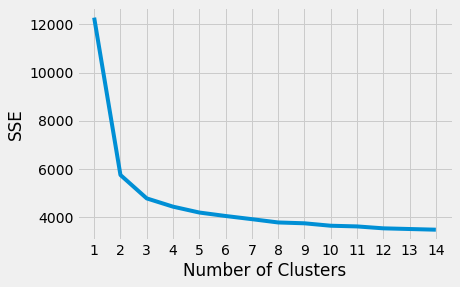

In [38]:
# Choosing the appropriate number of clusters

# elbow method
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cluster_df)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

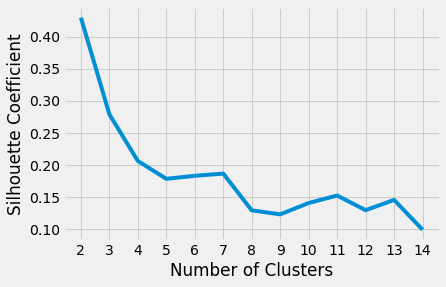

In [39]:
# silhouette method

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cluster_df)
    score = silhouette_score(cluster_df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [40]:
list_of_job_titles = list()
for i in range(len(df)):
    list_of_job_titles.append(df.loc[i, 'job_title'])

# print(len(list_of_job_titles))

# print(list_of_job_titles[:5])

In [41]:
def job_recommender(job):
    list_of_jobs_in_same_cluster = list()
    cluster = cluster_df.loc[job, 'Cluster']
    sub_cluster = cluster_df[cluster_df['Cluster'] == cluster].reset_index()['job_title']
    for i in range(len(sub_cluster)):
        list_of_jobs_in_same_cluster.append(sub_cluster.loc[i])
    job_with_salary = dict()
    for job_ in list_of_jobs_in_same_cluster:
        temp_df = df[df['job_title'] == job_]['avg_salary']
        for item in temp_df:
            job_with_salary[job_] = int(item)
    sorted_jobs = sorted(job_with_salary, key=job_with_salary.get)
    if job == sorted_jobs[-1]:
        result = [job]
        return result
    for i in range(len(sorted_jobs)):
        if sorted_jobs[i] == job:
            if i + 3 < len(sorted_jobs):
#                 print(sorted_jobs)
                result = [sorted_jobs[i+1], sorted_jobs[i+2], sorted_jobs[i+3]]
                return result
            if i + 2 < len(sorted_jobs):
                result = [sorted_jobs[i+1], sorted_jobs[i+2]]
                return result
            return [sorted_jobs[i+1]]

In [42]:
for job in list_of_job_titles:
    result = job_recommender(job)
    if len(result) == 3:
        cluster_df.loc[job, 'Recommended Job 1'] = result[0]
        cluster_df.loc[job, 'Recommended Job 2'] = result[1]
        cluster_df.loc[job, 'Recommended Job 3'] = result[2]
    if len(result) == 2:
        cluster_df.loc[job, 'Recommended Job 1'] = result[0]
        cluster_df.loc[job, 'Recommended Job 2'] = result[1]
        cluster_df.loc[job, 'Recommended Job 3'] = np.nan
    if len(result) == 1:
        cluster_df.loc[job, 'Recommended Job 1'] = result[0]
        cluster_df.loc[job, 'Recommended Job 2'] = np.nan
        cluster_df.loc[job, 'Recommended Job 3'] = np.nan

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [43]:
def recommend(cosine_similarity_array, job_profile_index):
    final_index = job_profile_index
    for i in range(2, len(cosine_similarity_array)):
        index = np.where(cosine_similarity_array == np.partition(cosine_similarity_array.flatten(), -i)[-i])
#         print('index: ', index)
        for var in index:
            final_index = var[0]
        if df.loc[final_index, 'avg_salary'] > df.loc[job_profile_index, 'avg_salary']:
            return final_index
    return job_profile_index

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_ = cosine_similarity(cluster_df.iloc[:, :-4])
cosine_similarity_recommendation = list()
for i in range(len(cosine_similarity_)):
    index = recommend(cosine_similarity_[i], i)
    cosine_similarity_recommendation.append(df.loc[index, 'job_title'])

index = 0    
for job in df['job_title']:
    cluster_df.loc[job, 'Cosine Similarity Recommendation'] = cosine_similarity_recommendation[index]
    index += 1

# cluster_df.head()

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


# Accepting skills from user and finding the present job profile

In [45]:
sorted_list_of_skills = sorted(list_of_skills)
count = [0] * 26
alphabets = ['.','3', 'A', 'B', 'C', 'D', 'E', 'e', 'F', 'G', 'H', 'I', 'i', 'J', 'j', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W' ]
prev_alphabet=''
count=0
start = "\033[1m"
end = "\033[0;0m"
for i in range(len(alphabets)):
  print(start+alphabets[i]+end)
  for index in range(len(sorted_list_of_skills)):  
    if sorted_list_of_skills[index][0]==alphabets[i]:
      count+=1
      print(str(index)+' - ' +sorted_list_of_skills[index], end='\t')      
      if count>=4:
        count=0
        print()
  print('\n-------------------------------------------------------------------------------------------------------------------------------------------------------')
    # if prev_alphabet != alphabets[i] and flag:
    #   print(alphabets[i])
    #   flag=0
    # if skill[0]==alphabets[i]:
    #   # prev_alphabet=alphabets[i]
    #   # flag=1
    #   print(alphabets[i], skill) 
    #   break

.
0 - .NET	
-------------------------------------------------------------------------------------------------------------------------------------------------------
3
1 - 3D Rendering	
-------------------------------------------------------------------------------------------------------------------------------------------------------
A
2 - ABAP/4	3 - ASP.NET Framework	
4 - AVEVA PDMS	5 - Account Management	6 - Accounting	7 - Accounts Payable	
8 - Accounts Receivable	9 - Administration	10 - Adobe Illustrator	11 - Adobe InDesign	
12 - Adobe Photoshop	13 - Advanced Business Application Programming (ABAP) Language	14 - Advertising	15 - Aeros	
16 - Agile Software Development	17 - Algorithm Development	18 - Amazon Web Services (AWS)	19 - Android Operating System Development	
20 - Android Software Development Kit (SDK)	21 - Angular.js	22 - Anti-Money Laundering (AML)	23 - Apache HTTP Server	
24 - Apache JMeter	25 - Apache Spark	26 - Apple Xcode IDE	27 - Auditing	
28 - Autodesk AutoCAD	29 - Au

In [46]:
print('Enter the skill number from the above list delimited with space:\n')
list_of_input = [int(var) for var in input().split(' ')]
for i in list_of_input:
    print(sorted_list_of_skills[i])

Enter the skill number from the above list delimited with space:

403 60 194 402 58 65 281 149 20 177 178 223
Web Development
C++ Programming Language
Machine Learning
Web Design
C Programming Language
Cascading Style Sheets (CSS)
Python
HTML
Android Software Development Kit (SDK)
JIRA
Java
MySQL


In [47]:
cluster_df.head()
new_cluster_df = cluster_df[[var for var in cluster_df.columns if var not in ['Cluster', 'Recommended Job 1', 'Recommended Job 2', 'Recommended Job 3', 'Cosine Similarity Recommendation']]]
# new_cluster_df.head()



In [48]:
list_of_input_skills = [sorted_list_of_skills[i] for i in list_of_input]
# print(list_of_input_skills)

In [49]:
for skill in new_cluster_df.columns:
    new_cluster_df.loc['input', skill] = 0
for skill in new_cluster_df.columns:
    if skill in list_of_input_skills:
        new_cluster_df.loc['input', skill] = 1

# new_cluster_df.loc['input', :]

<ipython-input-49-11a18542203a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cluster_df.loc['input', skill] = 0


In [50]:
from sklearn.metrics.pairwise import cosine_similarity
list_of_cosine_sim = []
for i in new_cluster_df.reset_index()['job_title']:
    if i != 'input':
        list_of_cosine_sim.append(cosine_similarity(np.array(new_cluster_df.loc[i, :]).reshape(1,-1), np.array(new_cluster_df.loc['input', :]).reshape(1,-1)))


In [51]:
current_job_profile_index = list_of_cosine_sim.index(max(list_of_cosine_sim))
# current_job_profile_index

## Salary Forecasting

In [52]:
df_main = pd.DataFrame()
list_of_data_frames = list()
for industry in ['Accounting-and-Finance', 'Architecture-and-Engineering', 'Business-Operations', 'General-Managers-and-Executives', 'Information-Technology', 'Marketing-and-Advertising']:
    df_ = pd.read_json('./Data/' + industry + '/AvgSalary _ PayByExperience.json', orient=str)
    df_.set_index('job_title', inplace=True)
    list_of_data_frames.append(df_)
        
average_salary_df = pd.concat(list_of_data_frames)

In [53]:
list_of_job_titles = list(average_salary_df.reset_index()['job_title'])
# list_of_job_titles

In [54]:
pay_by_experience_years_df = pd.DataFrame()
salary_dict = dict()
index = 0
list_of_problematic_job_titles = list()
for job in list_of_job_titles:
    pay_by_experience_years_text = average_salary_df.loc[job, 'pay_by_experience']
    pay_by_experience_years_component_title_list = list()
    pay_by_experience_years_component_value_list = list()
    print('job_title: ', job)
    print(pay_by_experience_years_text)
    print(type(pay_by_experience_years_text))
    temp_numbers_list = list()
    try:
        for text in pay_by_experience_years_text.split():
            if any(char.isdigit() for char in text):
                temp_numbers_list.append(text)

        for i in range(0, len(temp_numbers_list) - 2, 3):
            pay_by_experience_years_component_title_list.append(temp_numbers_list[i])
            pay_by_experience_years_component_value_list.append(temp_numbers_list[i + 1])

        salary_dict['job_title'] = job
        pay_by_experience_years_df.loc[index, 'job_title'] = job
    #     salary_dict['pay_by_experience_years'] =  pay_by_experience_years_component_title_list
        for label, value in zip( pay_by_experience_years_component_title_list,  pay_by_experience_years_component_value_list):
            salary_dict[label] = value
            pay_by_experience_years_df.loc[index, label] = value

        index += 1
    except:
        list_of_problematic_job_titles.append(job)

# salary_dict

job_title:  Accountant
An entry-level Accountant with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹198,740 based on 654 salaries. An early career Accountant with 1-4 years of experience earns an average total compensation of ₹231,272 based on 3,453 salaries. A mid-career Accountant with 5-9 years of experience earns an average total compensation of ₹297,060 based on 1,577 salaries. An experienced Accountant with 10-19 years of experience earns an average total compensation of ₹353,814 based on 865 salaries. In their late career (20 years and higher), employees earn an average total compensation of ₹394,115.  Read less
<class 'str'>
job_title:  Financial Analyst
An entry-level Financial Analyst with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹342,516 based on 639 salaries. An early career Financial Analyst with 1-4 years of experience

job_title:  Staff Engineer
An early career Staff Engineer with 1-4 years of experience earns an average total compensation (includes tips, bonus, and overtime pay) of ₹1,599,538 based on 33 salaries. A mid-career Staff Engineer with 5-9 years of experience earns an average total compensation of ₹2,077,180 based on 152 salaries. An experienced Staff Engineer with 10-19 years of experience earns an average total compensation of ₹2,983,164 based on 286 salaries. In their late career (20 years and higher), employees earn an average total compensation of ₹3,515,891.  Read less
<class 'str'>
job_title:  Instrumentation Engineer
An entry-level Instrumentation Engineer with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹313,680 based on 51 salaries. An early career Instrumentation Engineer with 1-4 years of experience earns an average total compensation of ₹330,485 based on 183 salaries. A mid-career Instrumentation Eng

job_title:  Associate Business Analyst
An entry-level Associate Business Analyst with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹403,365 based on 21 salaries. An early career Associate Business Analyst with 1-4 years of experience earns an average total compensation of ₹444,839 based on 89 salaries. A mid-career Associate Business Analyst with 5-9 years of experience earns an average total compensation of ₹565,000 based on 10 salaries.   Read less
<class 'str'>
job_title:  Project Management Officer
An entry-level Project Management Officer with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹425,000 based on 6 salaries. An early career Project Management Officer with 1-4 years of experience earns an average total compensation of ₹411,753 based on 48 salaries. A mid-career Project Management Officer with 5-9 years of experience earns a

job_title:  Partner - Accounting Firm, Tax
An early career Partner - Accounting Firm, Tax with 1-4 years of experience earns an average total compensation (includes tips, bonus, and overtime pay) of ₹600,000 based on 6 salaries. A mid-career Partner - Accounting Firm, Tax with 5-9 years of experience earns an average total compensation of ₹884,372 based on 10 salaries. An experienced Partner - Accounting Firm, Tax with 10-19 years of experience earns an average total compensation of ₹1,850,000 based on 7 salaries.   Read less
<class 'str'>
job_title:  Software Engineer
An entry-level Software Engineer with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹407,061 based on 2,456 salaries. An early career Software Engineer with 1-4 years of experience earns an average total compensation of ₹507,109 based on 14,678 salaries. A mid-career Software Engineer with 5-9 years of experience earns an average total compensatio

job_title:  Product Marketing Manager
An entry-level Product Marketing Manager with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹554,795 based on 19 salaries. An early career Product Marketing Manager with 1-4 years of experience earns an average total compensation of ₹780,732 based on 77 salaries. A mid-career Product Marketing Manager with 5-9 years of experience earns an average total compensation of ₹1,218,924 based on 102 salaries. An experienced Product Marketing Manager with 10-19 years of experience earns an average total compensation of ₹1,635,982 based on 68 salaries. In their late career (20 years and higher), employees earn an average total compensation of ₹900,000.  Read less
<class 'str'>
job_title:  Marketing Coordinator
An entry-level Marketing Coordinator with less than 1 year experience can expect to earn an average total compensation (includes tips, bonus, and overtime pay) of ₹244,645 based

In [55]:
pay_by_experience_years_df.fillna('0', inplace = True)

In [56]:
for i in range(len(pay_by_experience_years_df)):
    if '₹' in pay_by_experience_years_df.loc[i, '1']:
        pay_by_experience_years_df.loc[i, '1'] = pay_by_experience_years_df.loc[i, '1'].replace('₹', '')
        pay_by_experience_years_df.loc[i, '1'] = pay_by_experience_years_df.loc[i, '1'].replace(',', '')
    if '₹' in pay_by_experience_years_df.loc[i, '1-4']:
        pay_by_experience_years_df.loc[i, '1-4'] = pay_by_experience_years_df.loc[i, '1-4'].replace('₹', '')
        pay_by_experience_years_df.loc[i, '1-4'] = pay_by_experience_years_df.loc[i, '1-4'].replace(',', '')
    if '₹' in pay_by_experience_years_df.loc[i, '5-9']:
        pay_by_experience_years_df.loc[i, '5-9'] = pay_by_experience_years_df.loc[i, '5-9'].replace('₹', '')
        pay_by_experience_years_df.loc[i, '5-9'] = pay_by_experience_years_df.loc[i, '5-9'].replace(',', '')
    if '₹' in pay_by_experience_years_df.loc[i, '10-19']:
        pay_by_experience_years_df.loc[i, '10-19'] = pay_by_experience_years_df.loc[i, '10-19'].replace('₹', '')
        pay_by_experience_years_df.loc[i, '10-19'] = pay_by_experience_years_df.loc[i, '10-19'].replace(',', '')
    

In [57]:
list_of_pay_df_jobs = list(pay_by_experience_years_df['job_title'])
cluster_df.reset_index(inplace = True)
for i in range(len(cluster_df)):
    temp_job_title = cluster_df.loc[i, 'job_title'].replace('_', ' ')
    temp_job_title = temp_job_title.replace('%2C', ',')
    temp_job_title = temp_job_title.replace('%2F', '/')
    temp_job_title = temp_job_title.replace('%26', '&')
#     if temp_job_title not in list_of_pay_df_jobs:
#         print(temp_job_title)

In [58]:
cluster_df.set_index('job_title', inplace = True)

In [59]:
for i in range(len(pay_by_experience_years_df)):
    try:
        temp_job_title = pay_by_experience_years_df.loc[i, 'job_title'].replace(' ', '_')
        temp_job_title = temp_job_title.replace(',', '%2C')
        temp_job_title = temp_job_title.replace('/', '%2F')
        temp_job_title = temp_job_title.replace('&', '%26')
        pay_by_experience_years_df.loc[i, 'Recommended Job 1'] = cluster_df.loc[temp_job_title, 'Recommended Job 1']
        pay_by_experience_years_df.loc[i, 'Recommended Job 2'] = cluster_df.loc[temp_job_title, 'Recommended Job 2']
        pay_by_experience_years_df.loc[i, 'Recommended Job 3'] = cluster_df.loc[temp_job_title, 'Recommended Job 3']
    except:
#         print(pay_by_experience_years_df.loc[i, 'job_title'])
        pass

In [60]:
def format_string_space(string):
    string = string.replace('_', ' ')
    string = string.replace('%2C', ',')
    string = string.replace('%2F', '/')
    string = string.replace('%26', '&')
    return string

In [61]:
for i in range(len(pay_by_experience_years_df)):
    try:
        pay_by_experience_years_df.loc[i, 'Recommended Job 1'] = format_string_space(pay_by_experience_years_df.loc[i, 'Recommended Job 1'])    
        if not isinstance(pay_by_experience_years_df.loc[i, 'Recommended Job 2'], float):
            pay_by_experience_years_df.loc[i, 'Recommended Job 2'] = format_string_space(pay_by_experience_years_df.loc[i, 'Recommended Job 2'])
        if not isinstance(pay_by_experience_years_df.loc[i, 'Recommended Job 3'], float):
            pay_by_experience_years_df.loc[i, 'Recommended Job 3'] = format_string_space(pay_by_experience_years_df.loc[i, 'Recommended Job 3'])
    except:
#         print(pay_by_experience_years_df.loc[i, 'job_title'])
            pass

In [62]:
for i in range(len(pay_by_experience_years_df)):
    try:
        pay_by_experience_years_df.loc[i, 'salary_forecast_basic 1'] = list(pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == pay_by_experience_years_df.loc[i, 'Recommended Job 1']]['5-9'])[0]
        if not isinstance(pay_by_experience_years_df.loc[i, 'Recommended Job 2'], float):
            pay_by_experience_years_df.loc[i, 'salary_forecast_basic 2'] = list(pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == pay_by_experience_years_df.loc[i, 'Recommended Job 2']]['5-9'])[0]
        if not isinstance(pay_by_experience_years_df.loc[i, 'Recommended Job 3'], float):
            pay_by_experience_years_df.loc[i, 'salary_forecast_basic 3'] = list(pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == pay_by_experience_years_df.loc[i, 'Recommended Job 3']]['5-9'])[0]
    except:
#         print(pay_by_experience_years_df.loc[i, 'job_title'])
            pass

In [63]:
for i in range(len(pay_by_experience_years_df)):
    try:
        pay_by_experience_years_df.loc[i, 'avg_salary'] = average_salary_df.loc[pay_by_experience_years_df.loc[i, 'job_title'], 'avg_salary']
    except:
        print(pay_by_experience_years_df.loc[i, 'job_title'])

# pay_by_experience_years_df.head()

In [64]:
for i in range(len(pay_by_experience_years_df)):
    if '₹' in pay_by_experience_years_df.loc[i, 'avg_salary']:
        pay_by_experience_years_df.loc[i, 'avg_salary'] = pay_by_experience_years_df.loc[i, 'avg_salary'].replace('₹', '')
        pay_by_experience_years_df.loc[i, 'avg_salary'] = pay_by_experience_years_df.loc[i, 'avg_salary'].replace(',', '')

# pay_by_experience_years_df.head()

In [65]:
current_job_profile = new_cluster_df.reset_index().loc[current_job_profile_index, 'job_title']
current_job_profile = current_job_profile.replace('_', ' ')
current_job_profile = current_job_profile.replace('%2C', ',')
current_job_profile = current_job_profile.replace('%2F', '/')
current_job_profile = current_job_profile.replace('%26', '&')
# current_job_profile

In [66]:
final_output_df = pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == current_job_profile][['job_title', 'Recommended Job 1', 'Recommended Job 2', 'Recommended Job 3', 'salary_forecast_basic 1', 'salary_forecast_basic 2', 'salary_forecast_basic 3', 'avg_salary']]
# final_output_df

In [67]:
recommended_job_1 = final_output_df['Recommended Job 1']
recommended_job_1 = list(recommended_job_1)[0]

recommended_job_2 = final_output_df['Recommended Job 2']
recommended_job_2 = list(recommended_job_2)[0]

recommended_job_3 = final_output_df['Recommended Job 3']
recommended_job_3 = list(recommended_job_3)[0]

# print(recommended_job_1, '\n', recommended_job_2, '\n', recommended_job_3)

In [68]:
def format_string_underscore(string):
    string = string.replace(' ', '_')
    string = string.replace(',', '%2C')
    string = string.replace('/', '%2F')
    string = string.replace('&', '%26')
    return string

In [69]:
def recommend_skills_final(recommended_job, current_job_profile):
    recommended_job = format_string_underscore(recommended_job)
    
    list_of_recommended_job_skills = list()
    for job in new_cluster_df.columns:
        if new_cluster_df.loc[recommended_job, job] == 1:
            list_of_recommended_job_skills.append(job)
    
#     current_job_profile = format_string_underscore(current_job_profile)
#     list_of_current_job_profile_skills = list()
#     for job in new_cluster_df.columns:
#         if new_cluster_df.loc[current_job_profile, job] == 1:
#             list_of_current_job_profile_skills.append(job)
    
#     print(list_of_recommended_job_skills)
#     print(list_of_input_skills)
    
    return recommend_skills(list_of_recommended_job_skills, list_of_input_skills)

In [70]:
def recommend_skills(list_of_recommended_job_skills, list_of_current_job_profile_skills):
    res = [ele for ele in list_of_recommended_job_skills]
    for ele in list_of_current_job_profile_skills:
        if ele in list_of_recommended_job_skills:
            res.remove(ele)
    return res

In [71]:
recommend_skills_1 = recommend_skills_final(recommended_job_1, current_job_profile)
if not isinstance(recommended_job_2, float):
    recommend_skills_2 = recommend_skills_final(recommended_job_2, current_job_profile)
else:
    recommend_skills_2 = ['NaN']
if not isinstance(recommended_job_3, float):
    recommend_skills_3 = recommend_skills_final(recommended_job_3, current_job_profile)
else:
    recommend_skills_3 = ['NaN']

In [72]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-72-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [73]:
data = [[list(final_output_df['job_title'])[0], list(final_output_df['avg_salary'])[0], list(final_output_df['Recommended Job 1'])[0], list(final_output_df['salary_forecast_basic 1'])[0], recommend_skills_1, list(final_output_df['Recommended Job 2'])[0], list(final_output_df['salary_forecast_basic 2'])[0], recommend_skills_2, list(final_output_df['Recommended Job 3'])[0], list(final_output_df['salary_forecast_basic 3'])[0], recommend_skills_3]]
headers = ['Current Job Title', 'Current Average Salary', 'Recommended Job 1', 'Salary Forecast 1', 'Recommended Skills 1', 'Recommended Job 2', 'Salary Forecast 2', 'Recommended Skills 2', 'Recommended Job 3', 'Salary Forecast 3', 'Recommended Skills 3']
# pd.DataFrame(data, [0], headers)

In [74]:
data

[['Web Designer & Developer',
  '349698',
  'Android Software Developer',
  '807883',
  ['Software Development',
   'Object Oriented Programming (OOP)',
   'JavaScript',
   'SQLite',
   'Mobile applications development',
   'iOS',
   'Android Operating System Development'],
  'Systems Engineer, IT',
  '584945',
  ['SQL',
   'Linux',
   'Computer Hardware Technician',
   'Perl',
   'Windows Operating System General Use',
   'Cloud Computing',
   'System Administration',
   'Windows Server 2008 R2'],
  '.NET Software Developer / Programmer',
  '759313',
  ['ASP.NET Framework',
   'Model-view-controller (MVC)',
   '.NET',
   'Bootstrap',
   'C# Programming Language',
   'RESTful Web Services',
   'Angular.js',
   'Microsoft SQL Server',
   'SQL Server Integration Services (SSIS)']]]

In [75]:
data = [[list(final_output_df['job_title'])[0], '₹' + str(list(final_output_df['avg_salary'])[0]), list(final_output_df['Recommended Job 1'])[0], '₹' + str(list(final_output_df['salary_forecast_basic 1'])[0]), recommend_skills_1, list(final_output_df['Recommended Job 2'])[0], '₹' + str(list(final_output_df['salary_forecast_basic 2'])[0]), recommend_skills_2, list(final_output_df['Recommended Job 3'])[0], '₹' + str(list(final_output_df['salary_forecast_basic 3'])[0]), recommend_skills_3]]
headers = ['Current Job Title', 'Current Average Salary', 'Recommended Job 1', 'Salary Forecast 1', 'Recommended Skills 1', 'Recommended Job 2', 'Salary Forecast 2', 'Recommended Skills 2', 'Recommended Job 3', 'Salary Forecast 3', 'Recommended Skills 3']
salary_forecast_result = pd.DataFrame(data, [0], headers)
# salary_forecast_result

# Plots

# <font color = "red">Cluster Plot</font>

<AxesSubplot:title={'center':'BIRCH'}, xlabel='Cluster'>

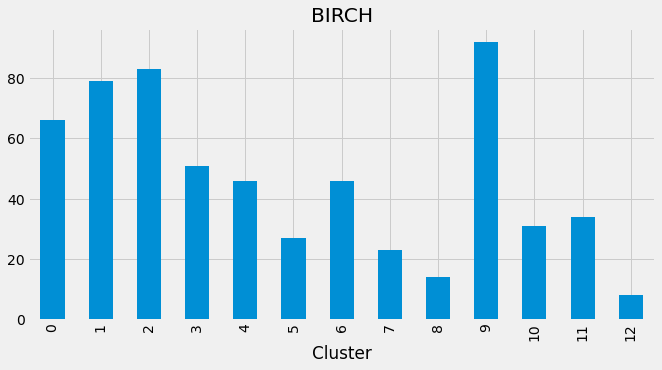

In [76]:
cluster_df.groupby('Cluster').count()['Verilog VHDL'].plot(kind = 'bar', title = 'BIRCH', figsize=(10,5))

In [77]:
# cluster_df[cluster_df['Cluster'] == 2]

In [78]:
# df[['job_title', 'avg_salary']][df['job_title'] == 'Project_Manager%2C_(Unspecified_Type_%2F_General)']

In [79]:
def find_list_of_skills(job_profile):
    list_of_job_profile_skills = list()
    for job in cluster_df.columns:
        if cluster_df.loc[job_profile, job] == 1:
            list_of_job_profile_skills.append(job)
            
    return list_of_job_profile_skills

In [80]:
# find_list_of_skills('Marketing_Automation_Manager')

In [81]:
# find_list_of_skills('Senior_Tax_Analyst')

In [82]:
# find_list_of_skills('Senior_Product_Management_Director')

In [83]:
# find_list_of_skills('Finance_Analyst')

## Top 10 most popular skills

In [84]:
# cluster_df.head()

In [85]:
list_of_skills_count = dict()
for skill in list_of_skills:
    list_of_skills_count[skill] = cluster_df[skill].sum()
    
# list_of_skills_count

In [86]:
from collections import Counter

In [87]:
sorted_popular_skills_dict = dict(sorted(list_of_skills_count.items(), key=lambda item: item[1], reverse = True))
# sorted_popular_skills_dict

In [88]:
top_10_popular_skills = Counter(sorted_popular_skills_dict).most_common(10)
# top_10_popular_skills

In [89]:
x_label = list()
y_label = list()
for item in top_10_popular_skills:
    x_label.append(item[0])
    y_label.append(item[1])
    
# print(x_label, y_label)

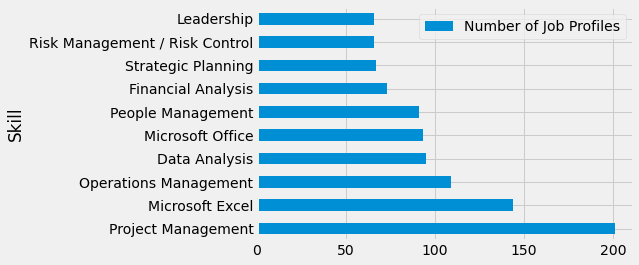

In [90]:
df_top_10_skills = pd.DataFrame({'Skill': x_label, 'Number of Job Profiles': y_label})
ax = df_top_10_skills.plot.barh(x='Skill', y='Number of Job Profiles', rot=0)

## Highest paid job in each cluster

In [91]:
def max_profile_of_cluster(cluster_job):
    sum_salary = 0
    count = 0
    dict_ = dict()
    for job in cluster_job:
        dict_[job] = int(list(df[df['job_title'] == job]['avg_salary'])[0])
        
    return max(dict_, key=dict_.get)

In [92]:
max_by_cluster_list = list()
for cluster_ in range(cluster_df['Cluster'].nunique()):
    cluster_by_job = cluster_df.reset_index().set_index('Cluster').loc[cluster_, 'job_title']
    max_by_cluster_list.append(max_profile_of_cluster(list(cluster_by_job)))
    
# max_by_cluster_list

In [93]:
average_salary_list_ = list()
for job in max_by_cluster_list:
    average_salary_list_.append(int(list(df[df['job_title'] == job]['avg_salary'])[0]))
    
# average_salary_list_

In [94]:
x_label = [format_string_space(job_profile) for job_profile in max_by_cluster_list]
y_label = average_salary_list_ #list(highest_paid_job.reset_index()['Cluster'])

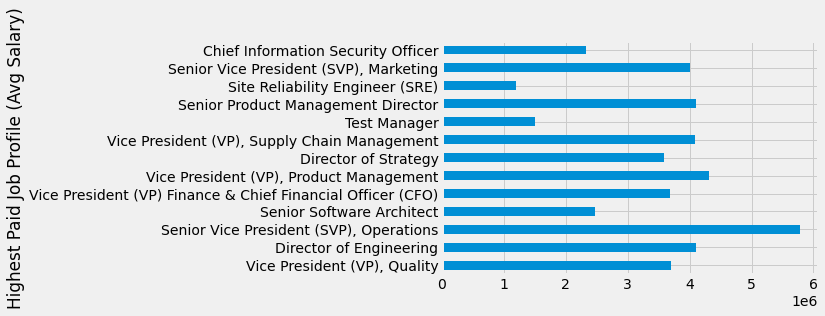

In [95]:
df_highest_paid_job_in_each_cluster = pd.DataFrame({'Highest Paid Job Profile (Avg Salary)': x_label, 'Average Salary': y_label})
ax = df_highest_paid_job_in_each_cluster.plot.barh(x='Highest Paid Job Profile (Avg Salary)', y='Average Salary', rot=0, legend = False)

## Average Salary vs Industry

In [96]:
# cluster_df.head()

In [97]:
job_title_vs_avg_salary = df[['job_title', 'avg_salary']]
# job_title_vs_avg_salary

In [98]:
count = 0
sum_salary = 0
for job in Accounting_and_Finance:
    sum_salary += int(list(job_title_vs_avg_salary[job_title_vs_avg_salary['job_title'] == job]['avg_salary'])[0])
    count += 1
    
# sum_salary/count

In [99]:
count = 0
sum_salary = 0
for job in Architecture_and_Engineering:
    sum_salary += int(list(job_title_vs_avg_salary[job_title_vs_avg_salary['job_title'] == job]['avg_salary'])[0])
    count += 1
    
# sum_salary/count

In [100]:
count = 0
sum_salary = 0
for job in Business_Operations:
    sum_salary += int(list(job_title_vs_avg_salary[job_title_vs_avg_salary['job_title'] == job]['avg_salary'])[0])
    count += 1
    
# sum_salary/count

In [101]:
count = 0
sum_salary = 0
for job in General_Managers_and_Executives:
    sum_salary += int(list(job_title_vs_avg_salary[job_title_vs_avg_salary['job_title'] == job]['avg_salary'])[0])
    count += 1
    
# sum_salary/count

In [102]:
count = 0
sum_salary = 0
for job in Information_Technology:
    sum_salary += int(list(job_title_vs_avg_salary[job_title_vs_avg_salary['job_title'] == job]['avg_salary'])[0])
    count += 1
    
# sum_salary/count

In [103]:
count = 0
sum_salary = 0
for job in Marketing_and_Advertising:
    sum_salary += int(list(job_title_vs_avg_salary[job_title_vs_avg_salary['job_title'] == job]['avg_salary'])[0])
    count += 1
    
# sum_salary/count

In [104]:
x_label = ['Accounting and Finance', 'Architecture and Engineering', 'Business Operations', 'General_Managers and Executives', 'Information Technology', 'Marketing and Advertising']
y_label = [730360.65, 675663.74, 846168.11, 2147366.07, 910134.48, 1175596.4]

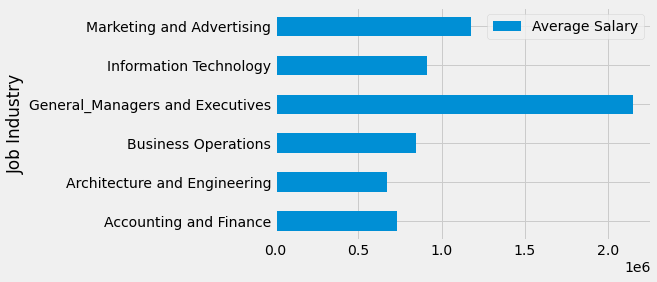

In [105]:
df_average_salary_in_each_industry = pd.DataFrame({'Job Industry': x_label, 'Average Salary': y_label})
ax = df_average_salary_in_each_industry.plot.barh(x='Job Industry', y='Average Salary', rot=0)

In [106]:
def average_by_cluster(cluster_job):
    sum_salary = 0
    count = 0
    for job in cluster_job:
        sum_salary += int(list(job_title_vs_avg_salary[job_title_vs_avg_salary['job_title'] == job]['avg_salary'])[0])
        count += 1
    return sum_salary/count

In [107]:
average_by_cluster_list = list()
for cluster_ in range(cluster_df['Cluster'].nunique()):
    cluster_by_job = cluster_df.reset_index().set_index('Cluster').loc[cluster_, 'job_title']
    average_by_cluster_list.append(average_by_cluster(list(cluster_by_job)))
    
# average_by_cluster_list

In [108]:
x_label = range(cluster_df['Cluster'].nunique())
y_label = average_by_cluster_list

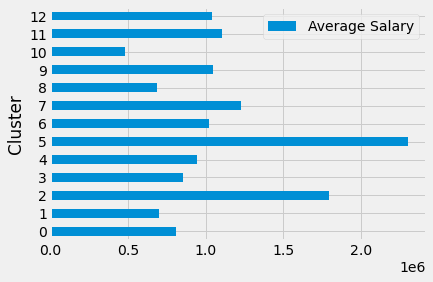

In [109]:
df_average_salary_in_each_cluster = pd.DataFrame({'Cluster': x_label, 'Average Salary': y_label})
ax = df_average_salary_in_each_cluster.plot.barh(x='Cluster', y='Average Salary', rot=0)

## Popular skills for each industry

In [110]:
def popular_skills_by_industry(job_profiles):
    temp_df = cluster_df.loc[job_profiles,:]
    list_of_skills_count = dict()
    for skill in list_of_skills:
        list_of_skills_count[skill] = sum(temp_df.loc[:, skill])
    
    return list(dict(sorted(list_of_skills_count.items(), key=lambda item: item[1], reverse = True)))[:5]

In [111]:
popular_skills_for_each_industry = dict()

popular_skills_for_each_industry['Accounting and Finance'] = popular_skills_by_industry(Accounting_and_Finance)
popular_skills_for_each_industry['Architecture and Engineering'] = popular_skills_by_industry(Architecture_and_Engineering)
popular_skills_for_each_industry['Business Operations'] = popular_skills_by_industry(Business_Operations)
popular_skills_for_each_industry['General Managers and Executives'] = popular_skills_by_industry(General_Managers_and_Executives)
popular_skills_for_each_industry['Information Technology'] = popular_skills_by_industry(Information_Technology)
popular_skills_for_each_industry['Marketing and Advertising'] = popular_skills_by_industry(Marketing_and_Advertising)

popular_skills_for_each_industry

{'Accounting and Finance': ['Microsoft Excel',
  'Financial Analysis',
  'Risk Management / Risk Control',
  'Financial Reporting',
  'Data Analysis'],
 'Architecture and Engineering': ['Engineering Design',
  'Project Management',
  'Autodesk AutoCAD',
  'Microsoft Office',
  'Microsoft Excel'],
 'Business Operations': ['Project Management',
  'Data Analysis',
  'Microsoft Excel',
  'Business Analysis',
  'Operations Management'],
 'General Managers and Executives': ['Operations Management',
  'People Management',
  'Leadership',
  'Project Management',
  'Strategic Planning'],
 'Information Technology': ['Java',
  'SQL',
  'JavaScript',
  'C# Programming Language',
  'Project Management'],
 'Marketing and Advertising': ['Marketing Communications',
  'Strategic Marketing',
  'Marketing Management',
  'Social Media Marketing',
  'Project Management']}

## Popular skills for each cluster

In [112]:
popular_skills_for_each_cluster = dict()
for i in range(13):
    temp_df = cluster_df.reset_index()[['job_title', 'Cluster']]
    temp_job_profiles = temp_df[temp_df['Cluster'] == i]['job_title']
    popular_skills_for_each_cluster[i] = popular_skills_by_industry(temp_job_profiles)

popular_skills_for_each_cluster

{0: ['Risk Management / Risk Control',
  'Financial Analysis',
  'Microsoft Excel',
  'Data Analysis',
  'Internal Audit'],
 1: ['Engineering Design',
  'Project Management',
  'Microsoft Office',
  'Microsoft Excel',
  'Autodesk AutoCAD'],
 2: ['Operations Management',
  'People Management',
  'Project Management',
  'Leadership',
  'Strategic Planning'],
 3: ['Java', 'SQL', 'JavaScript', 'C# Programming Language', '.NET'],
 4: ['Microsoft Excel',
  'Financial Reporting',
  'Financial Analysis',
  'Accounting',
  'General Ledger Accounting'],
 5: ['Project Management',
  'Product Management',
  'Product Development',
  'Agile Software Development',
  'Leadership'],
 6: ['Project Management',
  'Data Analysis',
  'Business Analysis',
  'Microsoft Excel',
  'SQL'],
 7: ['Vendor Management',
  'Negotiation',
  'Contract Negotiation',
  'Procurement',
  'Supply Chain'],
 8: ['Test Automation',
  'Java',
  'System Testing',
  'Test Planning',
  'Selenium Automated Test Tool'],
 9: ['Projec

# Salary Forecasting [UPD]

In [113]:
salary_forecast_df = cluster_df[[var for var in cluster_df.columns if var not in ['Cluster', 'Recommended Job 1', 'Recommended Job 2', 'Recommended Job 3', 'Cosine Similarity Recommendation']]]

for i in range(len(df)):
    salary_forecast_df.loc[df.loc[i, 'job_title'], 'avg_salary'] = df.loc[i, 'avg_salary']
    
# salary_forecast_df.head()

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [114]:
df2 = df[['job_title', 'popular_skills_component']]
# df2.head()

In [115]:
for i in range(len(df2)):
    df2.loc[i, 'popular_skills_component'] = df2.loc[i, 'popular_skills_component'].replace(' ', '')
    df2.loc[i, 'popular_skills_component'] = df2.loc[i, 'popular_skills_component'].replace(',', ' ')
    df2.loc[i, 'popular_skills_component'] = df2.loc[i, 'popular_skills_component'].replace("'", '')
    df2.loc[i, 'popular_skills_component'] = df2.loc[i, 'popular_skills_component'].replace('[', '')
    df2.loc[i, 'popular_skills_component'] = df2.loc[i, 'popular_skills_component'].replace(']', '')
    
# df2.head()

<ipython-input-115-44609de9c552>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i, 'popular_skills_component'] = df2.loc[i, 'popular_skills_component'].replace(' ', '')
<ipython-input-115-44609de9c552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i, 'popular_skills_component'] = df2.loc[i, 'popular_skills_component'].replace(',', ' ')
<ipython-input-115-44609de9c552>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [116]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [117]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

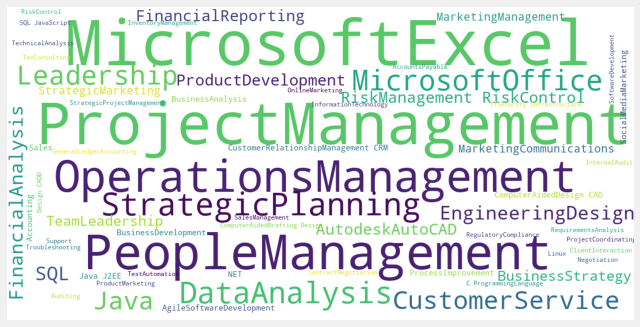

In [118]:
string_ = ''
for i in range(len(df2)):
    string_ += df2["popular_skills_component"][i]


# print wordcloud
show_wordcloud(string_)

In [119]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

#Non-alphanumeric & non printable characters
df2["popular_skills_component"]=df2["popular_skills_component"].replace(r"[^-a-zA-Z0-9]", ' ',regex=True)

#Email address
df2["popular_skills_component"]=df2["popular_skills_component"].replace(r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|'(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*')@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])", ' ',regex=True)

#Numeric characsters
df2["popular_skills_component"]=df2["popular_skills_component"].replace(r"[.+\d. +]", ' ',regex=True)

#URLs
df2["popular_skills_component"]=df2["popular_skills_component"].replace(r"/(?:(?:https?|ftp|file):\/\/|www\.|ftp\.)(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[-A-Z0-9+&@#\/%=~_|$?!:,.])*(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[A-Z0-9+&@#\/%=~_|$])/igm", ' ',regex=True)


#Converts all characters to lowercase
df2["popular_skills_component"]=df2["popular_skills_component"].str.lower()

#Removing stop words
df2["popular_skills_component"] = df2["popular_skills_component"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Multiple whitespaces to one
df2["popular_skills_component"]=df2["popular_skills_component"].str.strip()

# df2

[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Girish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-119-875c6b81df9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["popular_skills_component"]=df2["popular_skills_component"].replace(r"[^-a-zA-Z0-9]", ' ',regex=True)
<ipython-input-119-875c6b81df9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["popular_skills_component"]=df2["popular_skills_component"].replace(r"(?

In [120]:
! pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [121]:
from category_encoders import BinaryEncoder
be=BinaryEncoder(cols=['popular_skills_component'])
newcolumns=be.fit_transform(df2['popular_skills_component'])
df2=pd.concat([df2,newcolumns],axis=1)


C:\Users\Sai Girish\AppData\Roaming\Python\Python38\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [122]:
#Add the TF-IDF (Term Frequency — Inverse Document Frequency) values for every word and every document.
#and add TF-IDF columns

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
tfidf_result = tfidf.fit_transform(df2["popular_skills_component"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df2.index
df2 = pd.concat([df2, tfidf_df], axis=1)


In [123]:
# Drop the Text column after weight calculations are done on the texts
df2=df2.drop(['popular_skills_component'], axis=1)


In [124]:
df2.set_index('job_title', inplace = True)


In [125]:
for i in range(len(df)):
    df2.loc[df.loc[i, 'job_title'], 'avg_salary'] = int(df.loc[i, 'avg_salary'])


In [126]:
df2.reset_index(inplace = True)

df2.head()

,job_title,popular_skills_component_0,popular_skills_component_1,popular_skills_component_2,popular_skills_component_3,popular_skills_component_4,popular_skills_component_5,popular_skills_component_6,popular_skills_component_7,popular_skills_component_8,...,word_webdesign,word_webdevelopment,word_webperformancemonitoring,word_wellproductionengineering,word_windowsoperatingsystemgeneraluse,word_windowsserver,word_windowssupport,word_wireless,word_writingprocedures,avg_salary
0,Accountant,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249516.0
1,Financial_Analyst,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410750.0
2,Finance_Manager,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,992087.0
3,Chartered_Accountant,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,792205.0
4,Senior_Accountant,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407149.0


In [127]:
# Drop the Text column after weight calculations are done on the texts
df2=df2.drop(['job_title'], axis=1)

df2

,popular_skills_component_0,popular_skills_component_1,popular_skills_component_2,popular_skills_component_3,popular_skills_component_4,popular_skills_component_5,popular_skills_component_6,popular_skills_component_7,popular_skills_component_8,popular_skills_component_9,...,word_webdesign,word_webdevelopment,word_webperformancemonitoring,word_wellproductionengineering,word_windowsoperatingsystemgeneraluse,word_windowsserver,word_windowssupport,word_wireless,word_writingprocedures,avg_salary
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249516.0
1,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410750.0
2,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,992087.0
3,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,792205.0
4,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454945.0
596,0,0,0,0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020000.0
597,0,1,0,0,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4097561.0
598,0,0,0,0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,813497.0


In [128]:
## Data set is parsed
X_train = df2.loc[:500, 'popular_skills_component_0': 'word_writingprocedures']
Y_train = df2.loc[:500, 'avg_salary']
X_test = df2.loc[500:, 'popular_skills_component_0': 'word_writingprocedures']
Y_test = df2.loc[500:, 'avg_salary']

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(501, 489) (501,) (100, 489) (100,)


In [129]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
# n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
# Y = rng.randn(n_samples)
# X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'], df2.loc[:, 'avg_salary'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [130]:
regr.predict(X_test)

array([700451.99899353, 700447.71830803, 700449.24044521, 700432.75831564,
       700455.24871136, 700457.27350711, 700455.1653005 , 700448.77295748,
       700437.61225577, 700459.82740627, 700453.31259896, 700449.78639135,
       700455.23010136, 700449.06571579, 700440.04813643, 700457.41398119,
       700444.02486063, 700439.81069427, 700449.53219879, 700449.19378579,
       700442.07271099, 700450.86795114, 700423.61159473, 700433.12605746,
       700435.70791977, 700461.85766234, 700440.90981644, 700452.92311314,
       700425.59423304, 700457.7845813 , 700438.905319  , 700449.80552279,
       700437.44973438, 700461.52820822, 700457.62590588, 700454.4585188 ,
       700452.26320689, 700442.75455998, 700443.31246582, 700432.37468774,
       700433.57657164, 700450.63926012, 700452.84584512, 700435.06094618,
       700435.13902986, 700428.37231746, 700451.17506654, 700455.37996654,
       700424.87289402, 700439.94224176, 700454.90560162, 700453.62192042,
       700447.57482849, 7

In [131]:
from sklearn.metrics import r2_score
r2_score(list(Y_test), list(regr.predict(X_test)))

-0.33421629254099594

In [132]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'], df2.loc[:, 'avg_salary'])
reg.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

0.7921219732980164

In [133]:
Y_pred = reg.predict(X_test)
Y_pred

array([ 633130.37929345,  781559.26956759,  843891.57612894,
        763389.51074144, 1263451.73353665, 1893072.74335018,
       1341308.11795993, 1084637.49904765,  410642.38279934,
       2047318.47511217, 1675991.34902619, 1705317.34412463,
       1158872.23001282,  800351.06363869, 2511268.45871391,
       1842693.82916823,  -53543.3278564 , 1732960.36485409,
         38277.21138844, 1710990.94427253, 1209355.45865285,
        -26376.53771233,  522627.31250348, 1650544.31556367,
        604181.08019305,  892603.63109609,  787408.17971237,
        832551.42827991,  960905.70745218, 1388327.66921927,
        927074.46824727,  512371.10122373,  219153.86098679,
       4121016.18802948, 1940152.28079235, 1056239.29250829,
       1584851.17773382, 1171950.6445712 , 2002171.52977308,
        246145.65701717, 1716880.389297  ,  660234.97007382,
       1116058.38825485,  665490.54043243,  199854.93110546,
       1577402.52889519, 1004990.44379381, 1464403.55902054,
        833083.66794767,

In [134]:
X_test

,popular_skills_component_0,popular_skills_component_1,popular_skills_component_2,popular_skills_component_3,popular_skills_component_4,popular_skills_component_5,popular_skills_component_6,popular_skills_component_7,popular_skills_component_8,popular_skills_component_9,...,word_webcontentmanagement,word_webdesign,word_webdevelopment,word_webperformancemonitoring,word_wellproductionengineering,word_windowsoperatingsystemgeneraluse,word_windowsserver,word_windowssupport,word_wireless,word_writingprocedures
500,0,0,1,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0,0,1,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0,0,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0,0,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0,0,1,1,1,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0,0,0,0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0,1,0,0,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0,0,0,0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.5985742547476479

### Ridge Regression

In [136]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'], df2.loc[:, 'avg_salary'])
ridge_reg.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

0.7410420320857125

In [137]:
Y_pred = ridge_reg.predict(X_test)

r2_score(Y_test, Y_pred)

0.5152265957710986

### Ridge complexity

In [138]:
reg_ridge_complexity = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg_ridge_complexity.fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'], df2.loc[:, 'avg_salary'])
reg_ridge_complexity.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

0.7126925698903903

In [139]:
Y_pred = reg_ridge_complexity.predict(X_test)

r2_score(Y_test, Y_pred)

0.4661590645334571

### Lasso Regression

In [140]:
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'], df2.loc[:, 'avg_salary'])
reg_lasso.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36884776838137.55, tolerance: 55706111095.70588
  model = cd_fast.enet_coordinate_descent(


0.7921379027390649

In [141]:
Y_pred = reg_lasso.predict(X_test)

r2_score(Y_test, Y_pred)

0.5990990164719194

### LassoLarsCV Regression

In [142]:
reg_lasso_lars_cv = linear_model.LassoLarsCV(cv=5).fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'], df2.loc[:, 'avg_salary'])
reg_lasso_lars_cv.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 70 iterations, i.e. alpha=1.610e+03, with an active set of 68 regressors, and the smallest cholesky pivot element being 6.053e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 71 iterations, i.e. alpha=1.587e+03, with an active set of 69 regressors, and the smallest cholesky pivot element being 9.996e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 98 iterations, i

C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 59 iterations, i.e. alpha=1.952e+03, with an active set of 59 regressors, and the smallest cholesky pivot element being 7.743e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 62 iterations, i.e. alpha=1.815e+03, with an active set of 62 regressors, and the smallest cholesky pivot element being 7.743e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 64 iterations, i

0.40277705153277576

In [143]:
Y_pred = reg_lasso_lars_cv.predict(X_test)

r2_score(Y_test, Y_pred)

0.04895445830414491

### LassoLars Regression

In [144]:
reg_lasso_lars = linear_model.LassoLars(alpha=.1)
reg_lasso_lars.fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])
reg_lasso_lars.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 33 iterations, i.e. alpha=2.229e+03, with an active set of 33 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 43 iterations, i.e. alpha=1.951e+03, with an active set of 43 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 57 iterations, i

0.7226533721394824

In [145]:
Y_pred = reg_lasso_lars.predict(X_test)

r2_score(Y_test, Y_pred)

0.457687202524912

###  Bayesian Ridge Regression

In [146]:
reg_bayesian_ridge_regression = linear_model.BayesianRidge()
reg_bayesian_ridge_regression.fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])
reg_bayesian_ridge_regression.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

6.098976879087559e-11

In [147]:
Y_pred = reg_bayesian_ridge_regression.predict(X_test)

r2_score(Y_test, Y_pred)

-0.013280267631390785

### Tweedie Regressor

In [148]:
reg_tweedie_regressor = linear_model.TweedieRegressor(power = 1, alpha=0.5, link='log')
reg_tweedie_regressor.fit(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])
reg_tweedie_regressor.score(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'],df2.loc[:, 'avg_salary'])

C:\Users\SaiGirish\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


0.851383669509586

In [149]:
Y_pred_tweedie = reg_tweedie_regressor.predict(X_test)

r2_score(Y_test, Y_pred)

-0.013280267631390785

In [150]:
Y_pred_tweedie

array([ 506687.74035342,  880478.25443347,  450836.5929655 ,
        755569.53181737, 1220196.87631836, 1945781.00706626,
       1308668.15886758, 1017362.66910917,  296989.45524432,
       1512428.6886091 , 1907422.98516613, 1723725.52776195,
       1132125.75783779,  902121.43507873, 2679838.37798098,
       1980272.54800813,  192459.93595769, 1481785.01679892,
        257739.09357641, 1459556.80193351, 1007675.89493507,
        290678.79386736,  480185.78667097, 1641717.82065633,
        724327.75604704,  867558.7963731 ,  607969.21546237,
        770641.20953858, 1009636.47538049,  942816.04155787,
        925950.86547871,  483678.96335811,  278204.45219951,
       4979961.04116439, 1776266.63564524, 1090276.22402912,
       1647172.65413941, 1328666.75981835, 1927507.81635598,
        461621.94645193, 1728897.96895928,  626632.46389032,
       1022231.62470967,  623955.63453338,  277425.22893873,
       1555573.80719249,  727067.34430433, 1460355.71682474,
        869620.14152122,

### Polynomial Regressor

In [151]:
# from sklearn.linear_model import Perceptron
# from sklearn.preprocessing import PolynomialFeatures
# import numpy as np
# X = PolynomialFeatures(interaction_only=True).fit_transform(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures']).astype(int)
# clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(X, df2.loc[:, 'avg_salary'])

In [152]:
# clf.predict(X)

In [153]:
# clf.score(X, df2.loc[:, 'avg_salary'])

In [154]:
# Y_pred = clf.predict(PolynomialFeatures(interaction_only=True).fit_transform(X_test).astype(int))

# r2_score(Y_test, Y_pred)

## salary forecast [FINAL]

In [155]:
required_job = pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == 'Vice President (VP), Business Development']
required_job

,job_title,1,1-4,5-9,10-19,Recommended Job 1,Recommended Job 2,Recommended Job 3,salary_forecast_basic 1,salary_forecast_basic 2,salary_forecast_basic 3,avg_salary
511,"Vice President (VP), Business Development",0,628571,2016825,2947901,Director of Innovation,"Director, Consumer Insights",Senior Product Management Director,0,0,0,2942662


In [156]:
pay_by_experience_years_df.head()

,job_title,1,1-4,5-9,10-19,Recommended Job 1,Recommended Job 2,Recommended Job 3,salary_forecast_basic 1,salary_forecast_basic 2,salary_forecast_basic 3,avg_salary
0,Accountant,198740,231272,297060,353814,Staff Accountant,Tax Accountant,Finance Officer,344723,650000,423137,249659
1,Financial Analyst,342516,387058,587784,864224,Fund Accountant,Accounting Supervisor,Finance Analyst,690416,522156,585099,411265
2,Finance Manager,518021,731353,1076654,1202316,Fund Accounting Manager,"Partner - Accounting Firm, Tax",Tax Manager,1300000,884372,1393503,991180
3,Chartered Accountant,694767,737112,1124178,1799771,Financial Accounting Manager,Financial Manager,Assistant Controller (Financial),755744,1010166,1017365,794525
4,Quality Assurance Auditor,230000,306041,493677,513453,NaN,NaN,NaN,NaN,NaN,NaN,402542


In [157]:
pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == 'Client Service Executive']

,job_title,1,1-4,5-9,10-19,Recommended Job 1,Recommended Job 2,Recommended Job 3,salary_forecast_basic 1,salary_forecast_basic 2,salary_forecast_basic 3,avg_salary
238,Client Service Executive,243617,276531,431992,0,Lead Generation Manager,Business Development Officer,Import/Export Clerk,0,391501,308756,280704


In [158]:
temp_cluster = cluster_df
temp_cluster

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Embedded / Real-Time / RTOS,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation
job_title,,,,,,,,,,,,,,,,,,,,,
Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,Staff_Accountant,Tax_Accountant,Finance_Officer,Finance_Officer
Financial_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,Fund_Accountant,Accounting_Supervisor,Finance_Analyst,Senior_Financial_Analyst
Finance_Manager,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,4,Fund_Accounting_Manager,Partner_-_Accounting_Firm%2C_Tax,Tax_Manager,Finance_Manager
Chartered_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,4,Financial_Accounting_Manager,Financial_Manager,Assistant_Controller_(Financial),Senior_Auditor
Senior_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,Accounting_Analyst,Financial_Analyst,Fund_Accountant,Assistant_Controller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Media_Buyer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,Pay-Per-Click_(PPC)_Manager,Advertising_Manager,Facilities_Coordinator,Media_Buyer
Senior_Manager%2C_Creative_Services,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,Continuous_Improvement_Manager,Portfolio_Manager,Contracts_Manager,Accountant
Senior_Product_Management_Director,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,Senior_Product_Management_Director,NaN,NaN,Senior_Business_Manager


In [159]:
for i in range(len(df)):
    temp_cluster.loc[df.loc[i, 'job_title'], 'avg_salary'] = int(df.loc[i, 'avg_salary'])
    
temp_cluster.head()

C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\SaiGirish\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Staff_Accountant,Tax_Accountant,Finance_Officer,Finance_Officer,249516.0
Financial_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Fund_Accountant,Accounting_Supervisor,Finance_Analyst,Senior_Financial_Analyst,410750.0
Finance_Manager,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,4,Fund_Accounting_Manager,Partner_-_Accounting_Firm%2C_Tax,Tax_Manager,Finance_Manager,992087.0
Chartered_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,4,Financial_Accounting_Manager,Financial_Manager,Assistant_Controller_(Financial),Senior_Auditor,792205.0
Senior_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Accounting_Analyst,Financial_Analyst,Fund_Accountant,Assistant_Controller,407149.0


In [160]:
temp_cluster[temp_cluster['Cluster'] == 0].sort_values(by=['avg_salary'])

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Security_Supervisor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Loan_Officer,Claims_Adjuster_%2F_Examiner_%2F_Investigator,Fraud_Analyst,Operations_Supervisor,244761.0
Loan_Officer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Claims_Adjuster_%2F_Examiner_%2F_Investigator,Fraud_Analyst,Regulatory_Affairs_Associate,Credit_Analyst%2C_Banking,255468.0
Claims_Adjuster_%2F_Examiner_%2F_Investigator,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Fraud_Analyst,Regulatory_Affairs_Associate,Safety_Officer,Insurance_Underwriter,301816.0
Fraud_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Regulatory_Affairs_Associate,Safety_Officer,Finance_Associate,Insurance_Underwriter,310583.0
Regulatory_Affairs_Associate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,Safety_Officer,Finance_Associate,Associate_Auditor,Regulatory_Affairs_Specialist,339449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Senior_Manager_Auditor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,Associate_Vice_President_(AVP)%2C_Financial_Operations,Associate_Director_of_Financial_Services,Vice_President_(VP)%2C_Internal_Audit,Auditing_Manager,1861781.0
Associate_Vice_President_(AVP)%2C_Financial_Operations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Associate_Director_of_Financial_Services,Vice_President_(VP)%2C_Internal_Audit,Vice_President_(VP)%2C_Quality,Assistant_Manager,2146651.0
Associate_Director_of_Financial_Services,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Vice_President_(VP)%2C_Internal_Audit,Vice_President_(VP)%2C_Quality,NaN,Financial_Consultant,2632784.0


In [161]:
list_of_cluster_0 = list(temp_cluster[temp_cluster['Cluster'] == 0].sort_values(by=['avg_salary']).reset_index()['job_title'])
list_of_cluster_0

['Security_Supervisor',
 'Loan_Officer',
 'Claims_Adjuster_%2F_Examiner_%2F_Investigator',
 'Fraud_Analyst',
 'Regulatory_Affairs_Associate',
 'Safety_Officer',
 'Finance_Associate',
 'Associate_Auditor',
 'Financial_Advisor',
 'Investment_Advisor',
 'Fraud_Investigator',
 'Financial_Planner',
 'Safety_Engineer',
 'Compliance_Associate',
 'Certified_Financial_Planner_(CFP)',
 'Insurance_Underwriter',
 'Equity_Analyst',
 'Compliance_Analyst',
 'Regulatory_Affairs_Specialist',
 'Analyst%2C_Credit_Risk_Management',
 'Auditor',
 'Underwriter',
 'Compliance_Officer',
 'Assistant_Branch_Manager%2C_Banking',
 'Equity_Research_Associate',
 'Assistant_Operations_Manager',
 'Risk_Analyst',
 'Senior_Analyst%2C_Investment_Banking',
 'Internal_Auditor',
 'Claims_Manager%2C_Insurance',
 'SAS_Programmer',
 'Senior_Analyst%2C_Finance',
 'Credit_Manager',
 'Credit_Analyst',
 'Compliance_Specialist',
 'Credit_Analyst%2C_Banking',
 'Risk_Management_Analyst',
 'Credit_Risk_Analyst',
 'Assistant_Manager',


In [162]:
temp_result = salary_forecast_result
temp_result

,Current Job Title,Current Average Salary,Recommended Job 1,Salary Forecast 1,Recommended Skills 1,Recommended Job 2,Salary Forecast 2,Recommended Skills 2,Recommended Job 3,Salary Forecast 3,Recommended Skills 3
0,Web Designer & Developer,₹349698,Android Software Developer,₹807883,"[Software Development, Object Oriented Programming (OOP), JavaScript, SQLite, Mobile applications development, iOS, Android Operating System Development]","Systems Engineer, IT",₹584945,"[SQL, Linux, Computer Hardware Technician, Perl, Windows Operating System General Use, Cloud Computing, System Administration, Windows Server 2008 R2]",.NET Software Developer / Programmer,₹759313,"[ASP.NET Framework, Model-view-controller (MVC), .NET, Bootstrap, C# Programming Language, RESTful Web Services, Angular.js, Microsoft SQL Server, SQL Server Integration Services (SSIS)]"


In [163]:
temp_index = int(final_output_df['job_title'].index[0])
temp_index

478

In [164]:
pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == 'Storekeeper']

,job_title,1,1-4,5-9,10-19,Recommended Job 1,Recommended Job 2,Recommended Job 3,salary_forecast_basic 1,salary_forecast_basic 2,salary_forecast_basic 3,avg_salary
341,Storekeeper,300000,222472,262646,240000,Client Service Executive,Lead Generation Manager,Business Development Officer,431992,0,391501,283944


In [165]:
base_salary_predicted = reg_lasso.predict(df2.loc[:, 'popular_skills_component_0': 'word_writingprocedures'].iloc[temp_index:temp_index+2,:])
base_salary_predicted

array([483892.12945694, 970326.7947296 ])

In [166]:
temp_recommender_1 = pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == temp_result.loc[0, 'Recommended Job 1']]
temp_recommender_2 = pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == temp_result.loc[0, 'Recommended Job 2']]
temp_recommender_3 = pay_by_experience_years_df[pay_by_experience_years_df['job_title'] == temp_result.loc[0, 'Recommended Job 3']]
temp_recommender_1_1 = int(list(temp_recommender_1['1'])[0]) 
temp_recommender_1_5_9 = int(list(temp_recommender_1['5-9'])[0]) 
if len(temp_recommender_2) == 0:
    temp_result = temp_recommender_1[['job_title', 'Recommended Job 1', 'Recommended Job 2', 'Recommended Job 3', 'salary_forecast_basic 1', 'salary_forecast_basic 2', 'salary_forecast_basic 3', 'avg_salary']]
else:
    temp_recommender_2_1 = int(list(temp_recommender_2['1'])[0]) 
    temp_recommender_2_5_9 = int(list(temp_recommender_2['5-9'])[0]) 
    temp_recommender_3_1 = int(list(temp_recommender_3['1'])[0]) 
    temp_recommender_3_5_9 = int(list(temp_recommender_3['5-9'])[0]) 
    if temp_recommender_1_1 == 0 or temp_recommender_1_5_9 == 0:
        if 1.2 * base_salary_predicted[0] > int(list(temp_recommender_1['avg_salary'])[0]):
            temp_result.loc[0, 'Salary Forecast 1'] = 1.2 * base_salary_predicted[0]
        else:
            temp_result.loc[0, 'Salary Forecast 1'] = 1.2 * int(list(temp_recommender_1['avg_salary'])[0])
    else:
        percent_ = (temp_recommender_1_5_9 - temp_recommender_1_1) / temp_recommender_1_1
        temp_result.loc[0, 'Salary Forecast 1'] = (1 + percent_) * base_salary_predicted[0]

    if temp_recommender_2_1 == 0 or temp_recommender_2_5_9 == 0:
        if 1.25 * base_salary_predicted[0] > int(list(temp_recommender_2['avg_salary'])[0]):
            temp_result.loc[0, 'Salary Forecast 2'] = 1.25 * base_salary_predicted[0]
        else:
            temp_result.loc[0, 'Salary Forecast 2'] = 1.25 * int(list(temp_recommender_2['avg_salary'])[0])
    else:
        percent_ = (temp_recommender_2_5_9 - temp_recommender_2_1) / temp_recommender_2_1
        temp_result.loc[0, 'Salary Forecast 2'] = (1 + percent_) * base_salary_predicted[0]

    if temp_recommender_3_1 == 0 or temp_recommender_3_5_9 == 0:
        if 1.28 * base_salary_predicted[0] > int(list(temp_recommender_3['avg_salary'])[0]):
            temp_result.loc[0, 'Salary Forecast 3'] = 1.28 * base_salary_predicted[0]
        else:
            temp_result.loc[0, 'Salary Forecast 3'] = 1.28 * int(list(temp_recommender_3['avg_salary'])[0])
    else:
        percent_ = (temp_recommender_3_5_9 - temp_recommender_3_1) / temp_recommender_3_1
        temp_result.loc[0, 'Salary Forecast 3'] = (1 + percent_) * base_salary_predicted[0]

temp_result

,Current Job Title,Current Average Salary,Recommended Job 1,Salary Forecast 1,Recommended Skills 1,Recommended Job 2,Salary Forecast 2,Recommended Skills 2,Recommended Job 3,Salary Forecast 3,Recommended Skills 3
0,Web Designer & Developer,₹349698,Android Software Developer,1.89624e+06,"[Software Development, Object Oriented Programming (OOP), JavaScript, SQLite, Mobile applications development, iOS, Android Operating System Development]","Systems Engineer, IT",851881,"[SQL, Linux, Computer Hardware Technician, Perl, Windows Operating System General Use, Cloud Computing, System Administration, Windows Server 2008 R2]",.NET Software Developer / Programmer,1.56131e+06,"[ASP.NET Framework, Model-view-controller (MVC), .NET, Bootstrap, C# Programming Language, RESTful Web Services, Angular.js, Microsoft SQL Server, SQL Server Integration Services (SSIS)]"


# Cluster Analysis

Cluster 0 : 66, Banking and Auditing

Cluster 1 : 79, Core Engineers

Cluster 2 : 66, Banking and Auditing

Cluster 3 : 51, Software

Cluster 4 : 46, Finance

Cluster 5 : 27, Seniors and Executives

Cluster 6 : 46, Consultant and Analyst

Cluster 7 : 23, Manager

Cluster 8 : 14, Testing

Cluster 9 : 92, Miscellaneous

Cluster 10 : 31, Hardware & Support

Cluster 11 : 34, Marketing Managers

Cluster 12 : 8, Cyber Security

In [167]:
cluster_df['Cluster'].value_counts()

9     92
2     83
1     79
0     66
3     51
6     46
4     46
11    34
10    31
5     27
7     23
8     14
12    8 
Name: Cluster, dtype: int64

In [168]:
cluster_df[cluster_df['Cluster'] == 0]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Branch_Manager%2C_Banking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Senior_Auditor,Auditing_Manager,Risk_Management_Consultant,Treasury_Manager,801148.0
Senior_Manager_Accountant_%2F_Auditor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Senior_Risk_Manager,Senior_Manager_Auditor,Associate_Vice_President_(AVP)%2C_Financial_Operations,Auditor,1553876.0
Assistant_Branch_Manager%2C_Banking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Equity_Research_Associate,Assistant_Operations_Manager,Risk_Analyst,Branch_Manager%2C_Banking,496228.0
Credit_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Credit_Analyst,Compliance_Specialist,Credit_Analyst%2C_Banking,Credit_Analyst%2C_Banking,582863.0
Internal_Auditor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,Claims_Manager%2C_Insurance,SAS_Programmer,Senior_Analyst%2C_Finance,Senior_Auditor,528997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chief_Security_Officer_(CSO),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Senior_Manager_Accountant_%2F_Auditor,Senior_Risk_Manager,Senior_Manager_Auditor,Security_Analyst,1462586.0
Chief_Risk_Officer_(CRO),0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,Chief_Security_Officer_(CSO),Senior_Manager_Accountant_%2F_Auditor,Senior_Risk_Manager,Risk_Management_Manager,1400000.0
Vice_President_(VP)%2C_Internal_Audit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Vice_President_(VP)%2C_Quality,NaN,NaN,Senior_Auditor,3460437.0


In [169]:
cluster_df[cluster_df['Cluster'] == 1]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Civil_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Computer_Aided_Design_(CAD)_Engineer,Land_Surveyor,Mechanical_Design_Engineer,Project_Engineer%2C_Construction,309210.0
Mechanical_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Architect_(but_not_Landscape_or_Naval),Design_Architect,Biomedical_Engineer,Chemical_Engineer,350424.0
Design_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Project_Engineer,Electrical_Design_Engineer,Civil_Engineer%2C_Road_%2F_Highway,Hardware_Design_Engineer,371976.0
Electrical_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Mechanical_Designer,Design_Engineer,Project_Engineer,Environmental_Engineer,367382.0
Project_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Electrical_Design_Engineer,Civil_Engineer%2C_Road_%2F_Highway,Hardware_Engineer,Senior_Civil_Engineer,383933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Design_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Project_Manager%2C_Engineering,Project_Manager%2C_(Unspecified_Type_%2F_General),Design_Engineering_Manager,Design_Engineering_Manager,1184098.0
Project_Leader%2C_General,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Senior_Project_Architect,Senior_Structural_Engineer,Product_Development_Manager,Finance_Manager,966055.0
Project_Management_Officer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Senior_Civil_Engineer,Aeronautical_Engineer,Physical_Design_Engineer,Risk_Management_Analyst,579794.0


In [170]:
cluster_df[cluster_df['Cluster'] == 2]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Bank_Officer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,Customer_Relationship_Management_(CRM)_Manager,Manager_Trainee,Assistant_Bank_Manager,Assistant_Bank_Manager,334806.0
Branch_Manager%2C_Insurance_Office,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,Facilities_Manager,Operations_Manager,City_Manager,Bank_Manager,682224.0
Assistant_Bank_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,Event_Manager,Operations_Manager%2C_Banking,Branch_Manager%2C_Wholesale_Distributor,Assistant_Branch_Manager%2C_Banking,425000.0
Production_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,Operations_Administrator,Bank_Officer,Customer_Relationship_Management_(CRM)_Manager,Project_Management_Manager,298956.0
Chief_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,Program_Manager%2C_IT,General_Manager,Business_Unit_Manager,Operations_Director,2000965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Senior_Director_of_Strategy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,President_and_CEO,President,Senior_Vice_President_(SVP)%2C_Operations,President,4966466.0
Small_Business_Owner_%2F_Operator,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,Project_Manager%2C_Operations,Regional_Manager%2C_Services_Company,Technical_Advisor,Small_Business_Owner_%2F_Operator,900000.0
Clinical_Operations_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,General_%2F_Operations_Manager,Chief_Executive_Officer_(CEO)%2C_Non-Profit_Organization,State%2FTerritory_Manager%2C_General_Operations,State%2FTerritory_Manager%2C_General_Operations,1128000.0


In [171]:
cluster_df[cluster_df['Cluster'] == 3]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Senior_Associate_-_Investment_Banking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,Senior_Systems_Engineer,Software_Engineer,Java_Software_Developer_%2F_Programmer,Associate_-_Investment_Banking,530819.0
Quantitative_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Senior_Java_Developer,Module_Lead,Information_Technology_(IT)_Lead,Senior_Business_Analyst,967725.0
Research_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Data_Scientist,Technical_Consultant,Data_Engineer,Quantitative_Analyst,702173.0
Technical_Specialist,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,Lead_Software_Engineer,Lead_Software_Development_Engineer_(SDE),Project_Manager%2C_Software_Development,Principal_Software_Engineer,1250243.0
Technical_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Research_Engineer,Data_Scientist,Technical_Consultant,Technical_Consultant,699025.0
Senior_Technical_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Senior_Programmer_Analyst,Senior_Software_Engineer,Quantitative_Analyst,Quantitative_Analyst,890137.0
Software_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Java_Software_Developer_%2F_Programmer,Full_Stack_Software_Developer,Technology_Analyst,Sr._Software_Engineer_%2F_Developer_%2F_Programmer,539889.0
Senior_Software_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Quantitative_Analyst,Senior_Java_Developer,Module_Lead,Senior_Software_Engineer,925984.0
Software_Developer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,Application_Developer,Senior_Associate_-_Investment_Banking,Senior_Systems_Engineer,Senior_Software_Engineer,497909.0


In [172]:
cluster_df[cluster_df['Cluster'] == 4]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Staff_Accountant,Tax_Accountant,Finance_Officer,Finance_Officer,249516.0
Financial_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Fund_Accountant,Accounting_Supervisor,Finance_Analyst,Senior_Financial_Analyst,410750.0
Finance_Manager,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,4,Fund_Accounting_Manager,Partner_-_Accounting_Firm%2C_Tax,Tax_Manager,Finance_Manager,992087.0
Chartered_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,4,Financial_Accounting_Manager,Financial_Manager,Assistant_Controller_(Financial),Senior_Auditor,792205.0
Senior_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Accounting_Analyst,Financial_Analyst,Fund_Accountant,Assistant_Controller,407149.0
Senior_Financial_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Financial_Consultant,Senior_Tax_Accountant,Senior_Audit_Associate,Financial_Planning_Analyst,595698.0
Senior_Manager_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Senior_Finance_Manager,Financial_Controller,Vice_President_(VP)%2C_Finance,Auditor,1572299.0
General_Ledger_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Tax_Associate,Financial_Accountant,Senior_Accountant,Financial_Accountant,374024.0
Financial_Controller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,Vice_President_(VP)%2C_Finance,Chief_Financial_Officer_(CFO),Finance_Director,Finance_Officer,1835905.0


In [173]:
cluster_df[cluster_df['Cluster'] == 5]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Senior_Product_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Software_Development_Manager,Product_Line_Manager,Chief_Technology_Officer_(CTO),Director_of_Strategy,2351291.0
Lead_Business_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Product_Owner,Technical_Project_Manager,Product_Manager%2C_eCommerce,Product_Owner,1462203.0
Product_Manager%2C_Healthcare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Information_Technology_Specialist,Product_Manager%2C_Banking,Product_Manager%2C_Financial_Services,Purchasing_Manager,840000.0
Chief_Technology_Officer_(CTO),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Software_Engineering_Manager,Vice_President_(VP)_of_Product_Development,Product_Management_Director,Vice_President_(VP)%2C_Technology,2899716.0
Chief_Information_Officer_(CIO),0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Vice_President_(VP)%2C_Product_Management,NaN,NaN,Operations_Manager,4302318.0
Vice_President_(VP)%2C_Technology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Director%2C_Product_Development,Chief_Information_Officer_(CIO),Vice_President_(VP)%2C_Product_Management,Vice_President_(VP)%2C_Engineering,3573720.0
Vice_President_(VP)%2C_Product_Management,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Vice_President_(VP)%2C_Product_Management,NaN,NaN,Product_Manager%2C_Healthcare,4310887.0
Vice_President_(VP)_of_Product_Development,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Product_Management_Director,Vice_President_(VP)%2C_Information_Technology_(IT),Information_Technology_(IT)_Director,Vice_President_(VP)%2C_Product_Management,3041019.0
General_Manager%2C_Product_Development_Center,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,Senior_Product_Manager,Software_Development_Manager,Product_Line_Manager,Vice_President_(VP)_of_Product_Development,2148837.0


In [174]:
cluster_df[cluster_df['Cluster'] == 6]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Business_Analyst%2C_Finance%2FBanking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Implementation_Consultant,Business_Process_%2F_Management_Consultant,Asset_Manager,Asset_Manager,656911.0
Cost_Controller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,ERP_Consultant,Business_Intelligence_Consultant,SAP_Business_Analyst,Finance_Manager,750757.0
Asset_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Cost_Controller,ERP_Consultant,Business_Intelligence_Consultant,Senior_Auditor,707116.0
Principal_Architect,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Director_of_Strategy,NaN,NaN,Pre_Sales_Technical_Consultant,2973949.0
Senior_Business_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Business_Solution_Consultant,Strategic_Planning_Manager,Management_Consultant,Finance_Manager,988963.0
ERP_Consultant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Business_Intelligence_Consultant,SAP_Business_Analyst,Pre_Sales_Technical_Consultant,Business_Consultant,780206.0
Senior_SAP_Consultant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Associate_Project_Manager_(Unspecified_Type_%2F_General),Information_Technology_(IT)_Manager,Strategy_Consultant,SAP_Consultant,1184037.0
Business_Analyst_(Unspecified_Type),0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Business_Intelligence_(BI)_Analyst,Project_Analyst,Business_Analyst%2C_IT,Project_Analyst,531274.0
Business_Process_%2F_Management_Consultant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,Asset_Manager,Cost_Controller,ERP_Consultant,Information_Technology_(IT)_Consultant,701062.0


In [175]:
cluster_df[cluster_df['Cluster'] == 7]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Purchasing_Manager,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,Procurement_Manager,Strategic_Sourcing_Manager,Category_Manager,Procurement_Manager,845640.0
Supply_Chain_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,Purchasing_Manager,Procurement_Manager,Strategic_Sourcing_Manager,Procurement_Manager,835591.0
Procurement_Manager,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,Strategic_Sourcing_Manager,Category_Manager,Global_Sourcing_Manager,Procurement_Manager,994492.0
Logistics_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,Vendor_Manager,Materials_Manager,Senior_Buyer,Small_Business_Owner_%2F_Operator,607389.0
Procurement_Specialist,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,Business_Manager%2C_Logistics_%2F_Inventory_%2F_Distribution_%2F_Transportation,Buyer,Inventory_%2F_Purchasing_Manager,Procurement_Manager,450680.0
Buyer,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,Inventory_%2F_Purchasing_Manager,Logistics_Manager,Vendor_Manager,Senior_Buyer,537777.0
Purchaser,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,Supply_Chain_Coordinator,Procurement_Specialist,Business_Manager%2C_Logistics_%2F_Inventory_%2F_Distribution_%2F_Transportation,Inventory_%2F_Purchasing_Manager,388657.0
Procurement_Officer,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,Purchaser,Supply_Chain_Coordinator,Procurement_Specialist,Senior_Buyer,376406.0
Purchasing_Officer,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,Procurement_Officer,Purchaser,Supply_Chain_Coordinator,Procurement_Officer,312388.0


In [176]:
cluster_df[cluster_df['Cluster'] == 8]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Test_Engineer,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,8,Automation_Engineer,Validation_Engineer,Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,Test_Analyst,411003.0
Senior_Test_Engineer,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,8,Software_Development_Engineer%2C_Test_(SDET),Senior_Automation_Engineer,Senior_Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,Software_Development_Engineer%2C_Test_(SDET),709406.0
Senior_Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,Software_Test_Lead,Test_Manager,NaN,Design_Verification_Engineer,885473.0
Automation_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,Validation_Engineer,Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,Test_%2F_Quality_Assurance_(QA)_Analyst%2C_(Computer_Software),Senior_Automation_Engineer,450313.0
Senior_Automation_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,Senior_Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,Software_Test_Lead,Test_Manager,Senior_Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,870645.0
Validation_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,8,Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,Test_%2F_Quality_Assurance_(QA)_Analyst%2C_(Computer_Software),Test_Analyst,Senior_Test_Engineer,481069.0
Test_%2F_Quality_Assurance_(QA)_Engineer_(Computer_Software),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,Test_Engineer,Automation_Engineer,Validation_Engineer,Test_Engineer,395369.0
Quality_Assurance_(QA)_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,Test_%2F_Quality_Assurance_(QA)_Engineer_(Computer_Software),Test_Engineer,Automation_Engineer,Senior_Quality_Assurance_(QA)_%2F_Test_Automation_Engineer,383280.0
Software_Test_Lead,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,8,Test_Manager,NaN,NaN,Test_Analyst,1066397.0


In [177]:
cluster_df[cluster_df['Cluster'] == 9]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Portfolio_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,Contracts_Manager,Senior_Business_Development_Manager,Channel_Marketing_Manager,Accountant,1047358.0
Investment_Banking_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,Search_Engine_Optimization_(SEO)_Manager,Online_Community_Manager,SAP_ABAP_Programmer,Investment_Banking_Analyst,507770.0
Performance_Engineer,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,9,Assistant_Product_Manager,Integration_Engineer,Marketing_%26_Business_Development_Manager,Senior_Test_Engineer,629899.0
Supplier_Quality_Engineer_(SQE),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,Quantity_Surveyor,Customer_Relationship_Management_(CRM)_Consultant,Media_Planner,Certified_Public_Accountant_(CPA),388766.0
Computer_Hardware_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,Customer_Relationship_Management_(CRM)_Coordinator,Storekeeper,Client_Service_Executive,Robotics_Engineer,246439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Media_Buyer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,Pay-Per-Click_(PPC)_Manager,Advertising_Manager,Facilities_Coordinator,Media_Buyer,454945.0
Senior_Manager%2C_Creative_Services,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,Continuous_Improvement_Manager,Portfolio_Manager,Contracts_Manager,Accountant,1020000.0
Senior_Product_Management_Director,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,Senior_Product_Management_Director,NaN,NaN,Senior_Business_Manager,4097561.0


In [178]:
cluster_df[cluster_df['Cluster'] == 10]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Service_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,System_Administrator%2C_Computer_%2F_Network,Systems_Engineer_(Computer_Networking_%2F_IT),Network_Engineer,Field_Service_Engineer,269992.0
Desktop_Support_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,Desktop_Engineer,Field_Service_Technician,Electrical_Technician,Desktop_Engineer,193709.0
Field_Service_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,Systems_Administrator,Linux_System_Administrator,Operations_Engineer,Application_Support_Specialist,351736.0
Desktop_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,Field_Service_Technician,Electrical_Technician,Electronics_Technician,System_Administrator%2C_Windows_Server,196681.0
Site_Reliability_Engineer_(SRE),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,Site_Reliability_Engineer_(SRE),NaN,NaN,Development_Operations_(DevOps)_Engineer,1192691.0
Electronics_Technician,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,Service_Engineer,System_Administrator%2C_Computer_%2F_Network,Systems_Engineer_(Computer_Networking_%2F_IT),Field_Service_Engineer,261608.0
Field_Service_Technician,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,Electrical_Technician,Electronics_Technician,Service_Engineer,Field_Service_Engineer,245821.0
Operations_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,System_Administrator%2C_Windows_Server,SQL_Developer,Product_Support_Engineer,Product_Support_Engineer,414698.0
Electrical_Technician,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,Electronics_Technician,Service_Engineer,System_Administrator%2C_Computer_%2F_Network,Field_Service_Engineer,254560.0


In [179]:
cluster_df[cluster_df['Cluster'] == 11]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Chief_Marketing_Officer_(CMO),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,Senior_Vice_President_(SVP)%2C_Marketing,NaN,NaN,Brand_Manager,2750000.0
Senior_Vice_President_(SVP)%2C_Marketing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,Senior_Vice_President_(SVP)%2C_Marketing,NaN,NaN,Manager%2C_Corporate_Marketing,4000000.0
Marketing_Manager,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,Assistant_Brand_Manager,Strategic_Planner,Marketing_Communications_Manager,Brand_Marketing_Manager,688139.0
Marketing_Executive,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,11,Sales_and_Marketing_Coordinator,Marketing_Coordinator,Marketing_Officer,Social_Media_Marketing_Manager,290663.0
Digital_Marketing_Manager,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,11,Assistant_Marketing_Manager,Content_Marketing_Manager,Brand_Strategist,Content_Marketing_Manager,545309.0
Senior_Marketing_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,Global_Marketing_Manager,Program_Manager%2C_Marketing,Group_Product_Manager,Brand_Manager,1364004.0
Assistant_Marketing_Manager,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,11,Content_Marketing_Manager,Brand_Strategist,Project_Manager%2C_Marketing,Brand_Manager,601489.0
Social_Media_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,Marketing_Team_Leader,Digital_Marketing_Manager,Assistant_Marketing_Manager,Digital_Marketing_Manager,328406.0
Marketing_Director,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,Vice_President_(VP)%2C_Marketing,Chief_Marketing_Officer_(CMO),Senior_Vice_President_(SVP)%2C_Marketing,Assistant_Marketing_Manager,2474285.0


In [180]:
cluster_df[cluster_df['Cluster'] == 12]

,Internal Medicine,Business Intelligence,Vendor Management,Apache JMeter,Web Content Management,Pricing,Global Positioning Systems (GPS),Strategic Sales,Apache Spark,Cadence Electronic Design Software,...,Environmental Compliance,Forensic Interviewing,Tax Preparation,Regulatory Compliance,Cluster,Recommended Job 1,Recommended Job 2,Recommended Job 3,Cosine Similarity Recommendation,avg_salary
job_title,,,,,,,,,,,,,,,,,,,,,
Security_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Information_Security_Analyst,Cyber_Security_Engineer,Security_Consultant%2C_(Computing_%2F_Networking_%2F_Information_Technology),Information_Security_Analyst,483646.0
Information_Security_Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Cyber_Security_Engineer,Security_Consultant%2C_(Computing_%2F_Networking_%2F_Information_Technology),Security_Manager,Security_Manager,556834.0
Security_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Information_Security_Officer,Information_Security_Manager,Chief_Information_Security_Officer,Security_Manager,877939.0
Information_Security_Manager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Chief_Information_Security_Officer,NaN,NaN,Security_Analyst,1569545.0
Cyber_Security_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Security_Consultant%2C_(Computing_%2F_Networking_%2F_Information_Technology),Security_Manager,Information_Security_Officer,Security_Manager,605730.0
Information_Security_Officer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Information_Security_Manager,Chief_Information_Security_Officer,NaN,Information_Security_Manager,1074419.0
Chief_Information_Security_Officer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Chief_Information_Security_Officer,NaN,NaN,Information_Security_Analyst,2329209.0
Security_Consultant%2C_(Computing_%2F_Networking_%2F_Information_Technology),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,Security_Manager,Information_Security_Officer,Information_Security_Manager,Risk_Management_Manager,822687.0
